<a href="https://colab.research.google.com/github/namtoptall/DataScience/blob/main/NLP_trong_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08. Xử lý ngôn ngữ tự nhiên (NLP) với TensorFlow

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-example-nlp-problems.png)
*Một số ví dụ về bài toán xử lý ngôn ngữ tự nhiên (NLP) và hiểu ngôn ngữ tự nhiên (NLU). Chúng còn được gọi là bài toán sequence (từ sequence này đến sequence khác).*

Mục tiêu chính của [Xử lý ngôn ngữ tự nhiên (NLP)](https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32) là lấy thông tin từ ngôn ngữ tự nhiên.

Ngôn ngữ tự nhiên là một thuật ngữ rộng nhưng chúng ta có thể coi nó bao hàm bất kỳ những điều sau:
* Text (chẳng hạn như trong email, bài đăng blog, sách, Tweet)
* Speech (cuộc hội thoại với bác sĩ, khẩu lệnh truyền cho loa thông minh)

Chúng ta có thể thực hiện rất nhiều thứ về text và speech.

Nếu đang xây dựng một ứng dụng email, chúng ta có thể sẽ muốn quét email đến để xem chúng có phải là spam hay không (phân loại).

Nếu bạn đang cố gắng phân tích các phản hồi phàn nàn của khách hàng, có thể bạn sẽ muốn tìm hiểu xem những phàn nàn này dành cho bộ phận nào của công ty.

> 🔑 **Lưu ý:** Cả hai loại dữ liệu này thường được gọi là *sequence (chuỗi)* (câu là một chuỗi các từ). Do đó, chúng ta có một thuật ngữ thường thấy trong các bài toán NLP, đó là *seq2seq*, hay nói cách khác là tìm thông tin trong một chuỗi để tạo một chuỗi khác (ví dụ: chuyển đổi speech command thành một chuỗi các bước dựa trên text).

Để làm quen với NLP trong TensorFlow, chúng ta sẽ luyện tập các bước mà chúng ta đã sử dụng trước đó, nhưng lần này là với dữ liệu text (văn bản).

```
Text -> chuyển thành số -> xây dựng mô hình -> huấn luyện mô hình để tìm pattern -> sử dụng pattern (đưa ra dự đoán)
```

> 📖 **Tài liệu:** Để có cái nhìn tổng quan về NLP và các bài toán NLP khác nhau, hãy đọc bài viết [*A Simple Introduction to Natural Language Processing*](https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32).

## Những điều chúng ta sẽ tìm hiểu

Hãy tìm hiểu cụ thể

* Download tập dữ liệu text
* Trực quan hóa dữ liệu text
* Chuyển text thành các con số, sử dụng tokenization
* Biến text được mã hóa thành embedding
* Lập mô hình tập dữ liệu text
  * Bắt đầu với baseline (TF-IDF)
  * Xây dựng một số mô hình deep learning text
    * Dense, LSTM, GRU, Conv1D, Transfer learning
* So sánh chất lượng của từng mô hình
* Kết hợp các mô hình thành ensemble model
* Lưu và load mô hình đã huấn luyện
* Tìm ra những dự đoán sai nhất

## Cách tiếp cận notebook này

Các bạn có thể đọc qua các mô tả và code (tất cả sẽ chạy, trừ những cell mắc lỗi có chủ đích), nhưng có một lựa chọn tốt hơn.

Tự viết toàn bộ code.

Nghiêm túc đấy. Hãy tạo notebook mới và tự viết lại từng dòng. Kiểm tra xem bạn có thể thay đổi nó không và lý do cho điều đó.

Bạn không cần viết mô tả bằng văn bản nhưng tự viết lại code là một cách tuyệt vời để có trải nghiệm thực tiễn.

Đừng lo lắng nếu mắc sai sót, ai cũng đều mắc lỗi cả. Cách thực hiện tốt hơn và mắc ít lỗi hơn là viết nhiều code hơn.

> 📖 **Tài liệu:** Xem bộ tài liệu khóa học đầy đủ trên GitHub: https://github.com/mrdbourke/tensorflow-deep-learning

## Kiểm tra GPU

Để mô hình DL chạy nhanh nhất có thể, chúng ta cần quyền truy cập vào GPU.

Trong Google Colab, chúng ta có thể cài đặt điều này bằng cách tới Runtime -> Change runtime type -> Hardware accelerator -> GPU.

Sau khi chọn GPU, chúng ta có thể sẽ phải khởi động lại runtime.

In [ ]:
# Kiểm tra GPU
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-7c8181f1-42c3-e0c6-0862-932bb75fde7b)


## Lấy hàm hỗ trợ

Trong các mô-đun trước, chúng ta đã tạo khá nhiều hàm hỗ trợ để thực hiện các tác vụ nhỏ cần thiết cho notebook.

Thay vì viết lại toàn bộ, chúng ta có thể import script và load chúng từ đó.

Có thể tìm thấy script chứa các hàm hỗ trợ trên [GitHub](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py).

In [ ]:
# Download script hàm hỗ trợ
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-09-23 05:25:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.4’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-23 05:25:54 (43.6 MB/s) - ‘helper_functions.py.4’ saved [10246/10246]



In [ ]:
# Import chuỗi các hàm hỗ trợ cho notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Download tập dữ liệu text

Hãy bắt đầu bằng cách download tập dữ liệu văn bản. Chúng ta sẽ sử dụng tập dữ liệu [Real or Not?](https://www.kaggle.com/c/nlp-getting-started/data) từ Kaggle, có chứa các Tweet dựa trên văn bản về các thảm họa thiên nhiên.

Các Real Tweet về thảm họa như:

```
Jetstar and Virgin forced to cancel Bali flights again because of ash from Mount Raung volcano
```

Not Real Tweet là các tweet không thuộc chủ đề thảm họa (có thể là bất cứ chủ đề nào), chẳng hạn:

```
'Education is the most powerful weapon which you can use to change the world.' Nelson #Mandela #quote
```

Để thuận tiện, tập dữ liệu đã được [download từ Kaggle](https://www.kaggle.com/c/nlp-getting-started/data) (sẽ cần tài khoản Kaggle) và upload ở dạng file zip có thể download.

> 🔑 **Lưu ý:** Dữ liệu download ban đầu không bị thay đổi theo cách chúng ta download nó từ Kaggle.

In [ ]:
# Download dữ liệu (tương tự từ Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Giải nén dữ liệu
unzip_data("nlp_getting_started.zip")

--2021-09-23 05:25:57--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 172.253.120.128, 74.125.206.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.4’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2021-09-23 05:25:57 (101 MB/s) - ‘nlp_getting_started.zip.4’ saved [607343/607343]



Giải nén `nlp_getting_started.zip` sẽ được 3 file `.csv` sau:
* `sample_submission.csv` - ví dụ về file mà chúng ta nộp cho cuộc thi Kaggle có các dự đoán của mô hình.
* `train.csv` - các mẫu huấn luyện có real Tweet not real Tweet về thảm họa
* `test.csv` - các mẫu kiểm tra có real Tweet not real Tweet về thảm họa

## Trực quan hóa dữ liệu text

Sau khi có tập dữ liệu mới để làm việc, đầu tiên chúng ta sẽ làm gì?

Thăm dò? Kiểm tra? Làm quen?

Tất cả đều đúng.

Nhớ lại phương châm: visualize, visualize, visualize (trực quan hóa).

 Bây giờ, các mẫu dữ liệu text ở dạng file `.csv`. Để dễ dàng hiển thị, hãy chuyển chúng thành pandas DataFrame.

> 📖 **Tài liệu đọc:** Chúng ta sẽ gặp các tập dữ liệu text ở nhiều định dạng. Ngoài file CSV (định dạng mà chúng ta đang thao tác), chúng ta cũng có thể sẽ gặp file `.txt` và `.json`. Để làm việc với các kiểu file đó, các bạn hãy tham khảo hai bài viết sau trên Realpython:
* [How to Read and Write Files in Python](https://realpython.com/read-write-files-python/)
* [Working with JSON Data in Python](https://realpython.com/python-json/)

In [ ]:
# Biến file .csv thành pandas DataFrame
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Dữ liệu huấn luyện mà chúng ta đã download đã bị xáo trộn, nhưng để chắc chắn, hãy xáo trộn lại.

In [ ]:
# Xáo trộn training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # xáo trộn với random_state=42 cho khả năng tái lặp
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


Lưu ý cách dữ liệu huấn luyện có cột `"target"`.

Chúng ta sẽ viết code để tìm các pattern (ví dụ: các tổ hợp khác nhau của các từ) trong cột `"text"` của tập dữ liệu huấn luyện để dự đoán giá trị của cột `"target"`.

Tập dữ liệu kiểm tra không có cột `"target"`.

```
Input (cột text) -> Thuật toán Machine Learning -> Output (cột target)
```

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-text-classification-inputs-and-outputs.png)
*Ví dụ về đầu vào và đầu ra phân loại text cho bài toán phân loại xem Tweet có phải là về thảm họa không.*

In [ ]:
# Dữ liệu kiểm tra không có target (đó là điều mà chúng ta sẽ cố dự đoán)
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Hãy kiểm tra xem chúng ta có bao nhiêu mẫu của mỗi target.

In [ ]:
# Mỗi lớp có bao nhiêu mẫu?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

Vì chúng ta có hai giá trị target nên chúng ta sẽ giải quyết bài toán **phân loại nhị phân**.

Nó cũng khá cân bằng, khoảng 60% lớp negative (`target = 0`) và 40% lớp positive (`target = 1`).

Trong đó,

* `1` =  real disaster Tweet
* `0` = not real disaster Tweet

Vậy còn tổng số mẫu mà chúng ta có?

In [ ]:
# Có tổng cộng bao nhiêu mẫu?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


Có vẻ chúng ta có lượng dữ liệu huấn luyện và kiểm tra kha khá. Nếu có bất cứ điều gì, chúng ta có rất nhiều mẫu kiểm tra, thường có phân tách 90/10 (90% huấn luyện, 10% kiểm tra) hoặc 80/20 là đủ.

Đã đến lúc trực quan hóa, hãy viết một ít code để hiển thị các mẫu văn bản ngẫu nhiên.

> 🤔 **Câu hỏi:** Tại sao phải hiển thị các mẫu ngẫu nhiên? Chúng ta có thể hiển thị các mẫu theo thứ tự nhưng điều này có thể dẫn đến việc chúng ta chỉ thấy một tập dữ liệu con nhất định. Tốt hơn là hãy hiển thị một lượng đáng kể (hơn 100) mẫu ngẫu nhiên để nắm được các loại dữ liệu khác nhau mà chúng ta đang làm việc. Trong ML, đừng bao giờ đánh giá thấp sức mạnh của sự ngẫu nhiên.

In [ ]:
# Hãy hiển thị một số mẫu huấn luyện ngẫu nhiên
import random
random_index = random.randint(0, len(train_df)-5) # tạo các chỉ mục ngẫu nhiên không cao hơn tổng số mẫu
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
https://t.co/eCMUjkKqX1 @ArianaGrande @ScreamQueens 
Katherine's Death

---

Target: 0 (not real disaster)
Text:
@TinyJecht Are you another Stand-user? If you are I will have to detonate you with my Killer Queen.

---

Target: 1 (real disaster)
Text:
70 Years After Atomic Bombs Japan Still Struggles With War Past http://t.co/5wfXbAQMBK The anniversary of the devastation wrought by theÛ_

---

Target: 0 (not real disaster)
Text:
My lifelong all-time favorite song is 'Landslide'.  This song has gotten me through a lot of though times &amp;... http://t.co/RfB3JXbiEJ

---

Target: 0 (not real disaster)
Text:
I hear the mumbling i hear the cackling i got em scared shook panicking

---



### Chia dữ liệu thành các tập huấn luyện và kiểm định

Vì tập kiểm tra không có nhãn và chúng ta cần đánh giá các mô hình đã được huấn luyện, chúng ta sẽ tách một số dữ liệu huấn luyện và tạo một tập kiểm định.

Khi mô hình huấn luyện (thử các patter trong các mẫu Tweet), nó sẽ chỉ thấy dữ liệu từ tập huấn luyện và chúng ta có thể xem nó hoạt động như thế nào trên dữ liệu chưa biết thấy bằng cách sử dụng tập kiểm định.

Chúng ta sẽ chuyển đổi các phần tách từ kiểu dữ liệu pandas Series thành list các string (cho text) và list các int (cho nhãn) để dễ dàng sử dụng sau này.

Để tách tập dữ liệu huấn luyện và tạo tập dữ liệu kiểm định, chúng ta sẽ sử dụng phương thức [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) của Scikit-Learn và dành 10% mẫu huấn luyện cho tập kiểm định.

In [ ]:
from sklearn.model_selection import train_test_split

# Sử dụng train_test_split để tách dữ liệu huấn luyện thành các tập huấn luyện và kiểm định
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dành 10% mẫu cho tập kiểm định
                                                                            random_state=42) # random state cho khả năng tái lặp

In [ ]:
# Kiểm tra độ dài
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# Xem 10 câu huấn luyện đầu tiên và nhãn của chúng
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Chuyển text thành số

Tuyệt! Chúng ta có một tập huấn luyện và kiểm định chứa các Tweet và nhãn.

Các nhãn ở dạng số (`0` và `1`) nhưng Tweet thì ở dạng string.

> 🤔 **Câu hỏi:** Bạn nghĩ chúng ta cần làm gì trước khi có thể sử dụng thuật toán học máy với dữ liệu text?

Nếu bạn trả lời kiểu như "biến nó thành số" thì bạn đúng rồi đấy. Thuật toán học máy yêu cầu đầu vào phải ở dạng số.

Có hai khái niệm chính cho việc biến text thành số trong NLP:
* **Tokenization** - Ánh xạ trực tiếp từ từ hoặc ký tự hoặc sub-word sang một giá trị số. Có ba mức độ tokenization chính:
  1. Sử dụng **word-level tokenization** với câu "I love TensorFlow" sẽ được "I" là `0`, "love" là `1` và "TensorFlow" là `2`. Trong trường hợp này, mỗi từ trong một chuỗi được coi là một **token** đơn lẻ.
  2. **Character-level tokenization**, ví dụ như chuyển đổi các chữ cái A-Z thành các giá trị `1-26`. Trong trường hợp này, mỗi ký tự trong một chuỗi được coi là một **token** đơn lẻ.
  3. **Sub-word tokenization** ở giữa word-level và character-level tokenization. Nó chia nhỏ các từ riêng lẻ thành các phần nhỏ hơn và sau đó chuyển các phần nhỏ hơn đó thành số. Ví dụ: "my favourite food is pineapple pizza" có thể thành "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". Sau khi làm điều này, các sub-word đó sẽ được ánh xạ tới một giá trị số. Trong trường hợp này, mỗi từ có thể được coi là nhiều **tokens**.
* **Embedding** - Embedding là một đại diện của ngôn ngữ tự nhiên có thể học được, ở dạng **vectơ đặc trưng**. Ví dụ: từ "dance" có thể được biểu diễn bằng vectơ 5 chiều `[-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]`. Cần lưu ý ở đây là kích thước của vectơ đặc trưng có thể điều chỉnh được. Có hai cách để sử dụng embedding:
  1. **Tạo embedding riêng** - Khi văn bản được chuyển thành số (bắt buộc với embedding), chúng ta có thể đưa chúng qua một embedding layer ([`tf.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)), chúng ta sẽ học biểu diễn embedding trong quá trình huấn luyện mô hình.
  2. **Sử dụng lại embedding đã tìm hiểu trước đó** - Nhiều pre-trained embedding có trên mạng. Các pre-trained embedding này thường được học trên các kho ngữ liệu text lớn (chẳng hạn như tất cả Wikipedia) và do đó có mô tả cơ bản của ngôn ngữ tự nhiên. Chúng ta có thể sử dụng pre-trained embedding để khởi tạo mô hình và tinh chỉnh nó cho phù hợp với tác vụ cụ thể.

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-tokenization-vs-embedding.png)
*Ví dụ về **tokenization** (ánh xạ thằng từ word tới number) và **embedding** (biểu diễn phong phú hơn về mối quan hệ giữa các token).*

> 🤔 **Câu hỏi:** Tôi nên sử dụng tokenzation cấp độ nào? Tôi nên chọn embedding nào?

Điều này còn tùy thuộc vào bài toán. Chúng ta có thể thử character-level tokenization/embedding và word-level tokenization/embedding và xem cái nào thực hiện tốt nhất. Chúng ta thậm chí có thể muốn thử xếp chồng chúng (tức là kết hợp đầu ra của các embedding layer bằng cách sử dụng [`tf.keras.layers.concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/concatenate)).

Nếu bạn đang tìm kiếm pre-trained word embedding, có thể bắt đầu với [Word2vec embeddings](http://jalammar.github.io/illustrated-word2vec/), [GloVe embeddings](https://nlp.stanford.edu/projects/glove/) và nhiều tùy chọn có sẵn trên TensorFlow Hub.

> 🔑 **Lưu ý:** Giống như tìm kiếm mô hình thị giác máy tính đã huấn luyện trước, chúng ta có thể tìm kiếm pre-trained word embedding để sử dụng cho bài toán của mình. Hãy thử tìm kiếm "use pre-trained word embeddings" trên TensorFlow.

### Text vectorization (tokenization)

Chúng ta đã nói khá nhiều về tokenization và embedding, hãy tạo tokenization thôi.

Trước tiên, chúng ta sẽ luyện tập tokenzation (ánh xạ từ thành số).

Để tokenize từ, chúng ta sẽ sử dụng preprocessing layer hữu ích: [`tf.keras.layers.experimental.preprocessing.TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization).

`TextVectorization` layer có các tham số sau:
* `max_tokens` - Số lượng từ tối đa trong vốn từ vựng (ví dụ: 20000 hoặc số từ duy nhất trong text), bao gồm một giá trị cho token OOV (out of vocabulary).
* `standardize` - Phương pháp chuẩn hóa text. Mặc định là `"lower_and_strip_punctuation"` giảm text và xóa tất cả các dấu câu.
* `split` - Cách chia nhỏ text, mặc định là `"whitespace"` chia cả dấu cách.
* `ngrams` - Có bao nhiêu từ cần chứa mỗi lần chia token, chẳng hạn: `ngrams=2` chia token thành các chuỗi liên tiếp của 2.
* `output_mode` -  Làm thế nào để xuất token, có thể là `"int"` (ánh xạ số nguyên), `"binary"` (mã hóa one-hot), `"count"` hoặc `"tf-idf"`. Xem thêm tài liệu để biết thêm chi tiết.
* `output_sequence_length` - Độ dài của chuỗi tokenized để xuất. Ví dụ: nếu `output_sequence_length=150`, tất cả các chuỗi tokenized sẽ dài 150 token.
* `pad_to_max_tokens` - Mặc định là `False`, nếu `True` thì trục đặc trưng đầu ra sẽ được đệm thành `max_tokens` kể cả khi số lượng token duy nhất trong từ vựng ít hơn `max_tokens`. Chỉ có hiệu quả ở một số chế độ, xem tài liệu để biết thêm chi tiết.

Hãy xem chúng triển khai thế nào.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Lưu ý: trong TensorFlow 2.6+, chúng ta không cần "layers.experimental.preprocessing" nữa
# có thể sử dụng: "tf.keras.layers.TextVectorization", xem https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 để biết thêm chi tiết

# Sử dụng biến TextVectorization mặc định
text_vectorizer = TextVectorization(max_tokens=None, # có bao nhiêu từ trong từ vựng (toàn bộ các từ khác nhau trong text)
                                    standardize="lower_and_strip_punctuation", # cách xử lý text
                                    split="whitespace", # cách phân chia token
                                    ngrams=None, # có tạo nhóm n-từ không?
                                    output_mode="int", # cách ánh xạ token thành số
                                    output_sequence_length=None) # chuỗi đầu ra của token dài bao lâu?
                                    # pad_to_max_tokens=True) # Không hợp lệ nếu sử dụng max_tokens=None

Chúng ta đã khởi tạo đối tượng `TextVectorization` với thiết lập mặc định nhưng hãy tùy chỉnh nó một chút cho trường hợp này.

Cụ thể, hãy thiết lập giá trị cho `max_tokens` và `output_sequence_length`.

Với `max_tokens` (số từ trong từ vựng), bội số của 10,000 (`10,000`, `20,000`, `30,000`) hoặc số từ duy nhất chính xác trong text (ví dụ: `32,179`) là các giá trị thường gặp.

Đối với trường hợp này, chúng ta sẽ sử dụng 10.000.

Và với `output_sequence_length`, chúng ta sẽ sử dụng số lượng token trung bình mỗi Tweet trong tập huấn luyện. Nhưng trước tiên, chúng ta cần tìm ra nó.

In [ ]:
# Tìm số lượng token trung bình (từ) trong các Tweet huấn luyện
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

Bây giờ, hãy tạo một đối tượng `TextVectorization` khác bằng cách sử dụng các tham số tùy chỉnh.

In [ ]:
# Thiết lập text vectorization với các biến tùy chỉnh
max_vocab_length = 10000 # số lượng từ tối đa trong vocabulary
max_length = 15 # độ dài tối đa của các chuỗi (ví dụ: mô hình thấy bao nhiêu word từ một Tweet?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

Tuyệt!

Để ánh xạ `TextVectorization` instance `text_vectorizer` vào dữ liệu, chúng ta có thể gọi phương thức `adapt()` trên nó khi chuyển nó vào text huấn luyện.

In [ ]:
# Khớp text vectorizer với text huấn luyện
text_vectorizer.adapt(train_sentences)

Dữ liệu huấn luyện đã được ánh xạ! Hãy thử `text_vectorizer` trên một câu tùy thích (một câu tương tự như những gì chúng ta thấy trong dữ liệu huấn luyện).

In [ ]:
# Tạo câu mẫu và tokenize nó
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

Có vẻ chúng ta có một cách để biến văn bản thành số (trong trường hợp này là word-level tokenization). Chú ý số 0 ở cuối tensor được trả về, điều này là do chúng ta đặt `output_sequence_length=15`, tức là bất kể kích thước của chuỗi mà chúng ta truyền cho `text_vectorizer` là bao nhiêu, nó luôn trả về một chuỗi có độ dài 15.

Hãy thử `text_vectorizer` trên một vài câu ngẫu nhiên.

In [ ]:
# Chọn một câu ngẫu nhiên từ tập dữ liệu huấn luyện và tokenize nó
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3942 ships with 14 destroyed      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 159,  898,  491,    3,  759,  442, 1068,   17,  874, 1629, 1129,
         118, 1524, 1457, 6327]])>

Trông ổn đấy!

Cuối cùng, chúng ta có thể kiểm tra các token duy nhất trong từ vựng bằng phương thức `get_vocabulary()`.

In [ ]:
# Lấy các từ duy nhất trong từ vựng
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # những token phổ biến nhất (chú ý [UNK] token là những từ "chưa biết")
bottom_5_words = words_in_vocab[-5:] # những token ít phổ biến nhất
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Tạo Embedding bằng Embedding Layer

Chúng ta có cách để ánh xạ văn bản thành số. Làm thế nào để tiến xa hơn và biến những con số đó thành embedding?

Embedding có thể học trong quá trình huấn luyện. Điều này có nghĩa là thay vì chỉ cố định (ví dụ: `1` = I, `2` = love, `3` = TensorFlow), biểu diễn số của một từ có thể cải thiện khi mô hình đi qua các mẫu dữ liệu.

Chúng ta có thể thấy embedding một từ trông như thế nào bằng cách sử dụng layer [`tf.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding).

Các tham số chính mà chúng ta quan tâm ở đây là:
* `input_dim` - Kích thước của vocabulary (ví dụ: `len(text_vectorizer.get_vocabulary()`).
* `output_dim` - Kích thước của vectơ embedding đầu ra, ví dụ: giá trị `100` sẽ xuất ra vectơ đặc trưng có kích thước 100 cho mỗi từ.
* `embeddings_initializer` - Cách khởi tạo embedding matrix, mặc định là `"uniform"` sẽ ngẫu nhiên khởi tạo embedding matrix với phân phối đồng nhất. Điều này có thể được thay đổi để sử dụng các embedding đã tìm hiểu trước đó.
* `input_length` - Độ dài của chuỗi được chuyển đến embedding layer.

Sau khi nắm được những điều này, hãy tạo một embedding layer.

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # thiết lập shape đầu vào
                             output_dim=128, # thiết lập kích thước của vectơ embedding
                             embeddings_initializer="uniform", # mặc định, khởi tại ngẫu nhiên
                             input_length=max_length, # mỗi đầu vào dài bao nhiêu
                             name="embedding_1")

embedding

Hãy chú ý làm thế nào để `embedding` là một layer của TensoFlow. Điều này rất quan trọng vì chúng ta có thể sử dụng nó làm một phần của mô hình, nghĩa là các tham số của nó (biểu diễn từ) có thể cập nhật và cải thiện khi mô hình học.

Hãy thử nó trên một câu mẫu.

In [ ]:
# Lấy một câu ngẫu nhiên từ tập huấn luyện
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Nhúng câu ngẫu nhiên đó (biến nó thành biểu diễn số)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
UNR issues Severe Thunderstorm Warning [wind: 60 MPH hail: 0.75 IN] for Weston [WY] and Custer Fall River Lawrence Meade Pennington [SÛ_      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.0235487 , -0.02911143, -0.01600165, ..., -0.03135703,
         -0.03661771,  0.02812702],
        [ 0.03848192, -0.04844777,  0.0345685 , ..., -0.01402212,
         -0.04769395, -0.0404261 ],
        [-0.04240407,  0.04235772,  0.04278237, ..., -0.01318695,
          0.04171768,  0.01777187],
        ...,
        [-0.00522641,  0.04871375, -0.03742788, ...,  0.00540795,
         -0.04380312, -0.01817607],
        [ 0.03406706, -0.00160446,  0.00894339, ..., -0.0356751 ,
          0.00541915,  0.00282475],
        [ 0.02248487, -0.02848336,  0.04786098, ...,  0.03069806,
         -0.04317403, -0.04145076]]], dtype=float32)>

Mỗi token trong câu được chuyển thành một vector đặc trưng có độ dài 128.

In [ ]:
# Kiểm tra embedding của một token đơn lẻ
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-2.3548698e-02, -2.9111434e-02, -1.6001653e-02, -2.4854636e-02,
       -1.8839194e-02, -1.7742872e-02,  3.5991777e-02,  4.7734752e-03,
       -3.1464353e-02, -1.0192860e-02,  3.9272513e-02,  1.6213503e-02,
        3.5752203e-02, -7.9760700e-04, -4.6503343e-02,  4.1901264e-02,
        2.7158771e-02, -2.9694129e-02,  6.3859299e-04, -3.6073186e-02,
        3.7186686e-02,  8.1444494e-03, -3.4610189e-02, -1.2373447e-02,
        3.3506799e-02,  3.4542195e-03, -3.4555770e-02,  3.0121803e-03,
        1.2546945e-02,  1.8180419e-02, -2.8727353e-02,  3.0131452e-03,
        2.2011306e-02,  1.5216086e-02,  8.3960593e-05, -4.9976040e-02,
       -4.1987814e-02, -1.4751814e-02,  3.1978119e-02,  3.0810181e-02,
        1.3748173e-02,  1.3646554e-02, -1.8768311e-03,  5.6033619e-03,
       -3.2450367e-02, -3.2819200e-02,  6.4723380e-03,  2.4402250e-02,
       -4.9929023e-02,  8.7605603e-03,  3.7449453e-02, -3.0369056e-02,
        2.8607275e-02, -8.942

Những giá trị này có thể không có nhiều ý nghĩa với chúng ta, nhưng đó là những gì máy tính thấy về mỗi từ. Khi mô hình tìm kiếm các pattern trong các mẫu khác nhau, các giá trị này sẽ được cập nhật khi cần thiết.

> 🔑 **Lưu ý:** Hai khái niệm trước (tokenization và embedding) là cơ sở cho nhiều tác vụ NLP. Vì vậy, nếu bạn không chắc chắn về bất cứ điều gì, hãy nghiên cứu và tiến hành các thử nghiệm của bản thân để hiểu thêm.

## Mô hình hóa dữ liệu text

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-inputs-and-outputs-with-shapes-and-models-were-going-to-build.png)
*Sau khi đã chuẩn bị đầu vào và đầu ra, hãy xây dựng mô hình học máy để thu hẹp khoảng cách giữa chúng.*

Chúng ta đã có một cách để biến dữ liệu văn bản thành số, hãy bắt đầu xây dựng các mô hình học máy để mô hình hóa nó.

Để luyện tập nhiều, chúng ta sẽ xây dựng một loạt các mô hình khác nhau, mỗi mô hình là một thử nghiệm. Sau đó, chúng ta sẽ so sánh kết quả của từng mô hình và xem mô hình nào hoạt động tốt nhất.

Cụ thể, chúng ta sẽ xây dựng những mô hình sau:
* **Model 0**: Naive Bayes (mô hình cơ sở)
* **Model 1**: Feed-forward neural network (dense model)
* **Model 2**: Mô hình LSTM
* **Model 3**: Mô hình GRU
* **Model 4**: Mô hình Bidirectional-LSTM
* **Model 5**: 1D Convolutional Neural Network
* **Model 6**: TensorFlow Hub Pretrained Feature Extractor
* **Model 7**: Tương tự model 6 nhưng với 10% dữ liệu huấn luyện

Model 0 là mô hình đơn giản nhất để có được mô hình cơ sở, từ đó kỳ vọng vượt qua các mô hình sâu hơn khác.

Mỗi thử nghiệm sẽ trải qua các bước sau:
* Xây dựng mô hình
* Huấn luyện mô hình
* Đưa ra dự đoán với mô hình
* Theo dõi các phép đánh giá dự đoán cho các so sánh sau này

Hãy bắt đầu thôi.

### Model 0: Mô hình cơ sở

Như tất cả các thử nghiệm lập mô hình học máy, cần tạo mô hình cơ sở để đánh giá xếp hạng các thử nghiệm trong tương lai.

Để xây dựng mô hình cơ sở, chúng ta sẽ tạo một Scikit-Learn Pipeline bằng cách sử dụng công thức TF-IDF để chuyển đổi từ thành số rồi mô hình hóa chúng bằng [thuật toán Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB). Điều này đã được chọn thông qua tham chiếu [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

> 📖 **Tài liệu đọc:** Thông tin chi tiết của thuật toán TF-IDF nằm ngoài phạm vi của notebook này, tuy nhiên, những độc giả tò mò hãy xem tài liệu của Scikit-Learn [tài liệu của Scikit-Learn](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting) để tìm hiểu thêm.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Tạo tokenization và lập mô hình pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # chuyển từ thành số, sử dụng tfidf
                    ("clf", MultinomialNB()) # lập mô hình văn bản
])

# Khớp pipeline với dữ liệu huấn luyện
model_0.fit(train_sentences, train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Lợi ích của việc sử dụng mô hình nông như mô hình Multinomial Naive Bayes là việc huấn luyện diễn ra rất nhanh.

Hãy đánh giá mô hình và tìm phép đo mô hình cơ bản.

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


Hãy đưa ra một số dự đoán với mô hình cơ sở của chúng ta.

In [ ]:
# Đưa ra dự đoán
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Tạo hàm đánh giá cho các thử nghiệm mô hình

Chúng ta có thể đánh giá ngay những điều này, nhưng vì sau này chúng ta sẽ đánh giá một số mô hình theo cách tương tự, nên hãy tạo một hàm hỗ trợ giúp lấy một mảng các dự đoán và nhãn gốc, và tính toán những thứ sau:
* Accuracy
* Precision
* Recall
* F1-score

> 🔑 **Lưu ý:** Đây là những phép đo thích hợp nhất vì chúng ta đang giải bài toán phân loại. Nếu chúng ta gặp bài toán hồi quy, các phép đo khác như MAE (sai số tuyệt đối có nghĩa là) sẽ là thích hợp hơn.

In [ ]:
# Hàm để đánh giá: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Tính accuracy, precision, recall và f1 score của mô hình phân loại nhị phân.

  Đối số:
  -----
  y_true = true label ở dạng mảng 1D
  y_pred = predicted label ở dạng mảng 1D

  Trả về một dictionary có accuracy, precision, recall, f1-score.
  """
  # Tính model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Tính model precision, recall và f1 score sử dụng "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Nhận baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 1: Dense model cơ bản

Mô hình "sâu" đầu tiên mà chúng ta sẽ xây dựng là mô hình tầng kết nối dày đặc. Trên thực tế, nó sẽ hầu như không có layer duy nhất.

Mô hình này sẽ lấy văn bản và nhãn làm đầu vào, tokenize văn bản, tạo embedding, tìm mức trung bình của embedding (sử dụng Global Average Pooling), sau đó chuyển mức trung bình qua một layer kết nối đầy đủ với một nút đầu ra và hàm kích hoạt sigmoid

Nếu câu trước còn khó hiểu, hãy mã hóa nó ra (hãy nhớ, nếu nghi ngờ điều gì, hãy viết mã)

Chúng ta sẽ xây dựng một số mô hình học sâu TensorFlow, hãy import hàm `create_tensorboard_callback()` từ `helper_functions.py` để theo dõi kết quả của từng mô hình.

In [ ]:
# Tạo tensorboard callback (cần tạo một tensorboard callback mới cho từng mô hình)
from helper_functions import create_tensorboard_callback

# Tạo directory để lưu TensorBoard logs
SAVE_DIR = "model_logs"

Hàm TensorBoard callback đã sẵn sàng, hãy xây dựng mô hình sâu đầu tiên của chúng ta.

In [ ]:
# Xây dựng mô hình với Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # đầu vào là các string 1 chiều
x = text_vectorizer(inputs) # turn the input text into numbers biến text đầu vào thành số
x = embedding(x) # tạo embedding có các số được đánh số
x = layers.GlobalAveragePooling1D()(x) # giảm kích thước của embedding (thử chạy mô hình không có layer này và xem điều gì sẽ xảy ra)
outputs = layers.Dense(1, activation="sigmoid")(x) # tạo layer đầu ra, chúng ta muốn đầu ra nhị phân, vì vậy hãy sử dụng kích hoạt sigmoid
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # xây dựng mô hình

Trông ổn đấy. Mô hình lấy string 1 chiều làm đầu vào (trong trường hợp này là Tweet), sau đó nó tokenize string với `text_vectorizer` và tạo embedding bằng `embedding`.

Sau đó, chúng ta (tùy chọn) gộp các đầu ra của embedding layer để giảm kích thước của tensor mà chúng ta truyền cho layer đầu ra.

> 🛠 **Luyện tập:** Hãy thử xây dựng `model_1` có và không có layer `GlobalAveragePooling1D()` sau layer `embedding`. Điều gì sẽ xảy ra? Tại sao lại như vậy?

Cuối cùng, chúng ta chuyển đầu ra của pooling layer thành một dense layer với kích hoạt sigmoid (chúng ta sử dụng sigmoid vì đây là bài toán phân loại nhị phân).

Trước khi khớp mô hình với dữ liệu, chúng ta cần biên dịch nó. Do chúng ta đang thực hiện phân loại nhị phân, nên hãy sử dụng `"binary_crossentropy"` làm hàm mất mát và Adam optimizer.

In [ ]:
# Biên dịch mô hình
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Mô hình đã được biên dịch. Hãy lấy summary.

In [ ]:
# Lấy summary của mô hình
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


Hầu hết các tham có thể huấn luyện được chứa trong embedding layer. Nhớ rằng chúng ta đã tạo một embedding có kích thước 128 (`output_dim=128`) cho từ vựng có kích thước 10,000 (`input_dim=10000`), do đó có 1,280,000 tham số có thể huấn luyện.

Mô hình đã được biên dịch, hãy khớp nó với dữ liệu huấn luyện cho 5 epoch. Chúng ta cũng sẽ chuyển hàm TensorBoard callback để đảm bảo rằng các phép đo huấn luyện của mô hình được ghi lại.

In [ ]:
# Khớp mô hình
model_1_history = model_1.fit(train_sentences, # các câu đầu vào có thể là một list các string do mô hình tích hợp sẵn layer tiền xử lý text
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20210923-052559
Epoch 1/5
215/215 [==============================] - 5s 17ms/step - loss: 0.6094 - accuracy: 0.6916 - val_loss: 0.5357 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4410 - accuracy: 0.8189 - val_loss: 0.4691 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3463 - accuracy: 0.8605 - val_loss: 0.4590 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2848 - accuracy: 0.8923 - val_loss: 0.4641 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2380 - accuracy: 0.9118 - val_loss: 0.4767 - val_accuracy: 0.7874


Vì chúng ta đang sử dụng một mô hình đơn giản, nên mỗi epoch xử lý rất nhanh.

Hãy kiểm tra chất lượng của mô hình trên tập kiểm định.

In [ ]:
# Kiểm tra kết quả
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 7ms/step - loss: 0.4767 - accuracy: 0.7874


[0.4766846001148224, 0.787401556968689]

In [ ]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.00073166,  0.01504797, -0.03425457, ..., -0.04403538,
         -0.01042282,  0.01876436],
        [ 0.04135862, -0.03945084, -0.03811942, ...,  0.00464737,
          0.03163553,  0.029283  ],
        [ 0.00684031,  0.05363134, -0.00241555, ..., -0.07082176,
         -0.04750705,  0.01448254],
        ...,
        [-0.03301444, -0.0052493 , -0.04209725, ...,  0.02028764,
          0.00308807,  0.02215792],
        [ 0.00692343,  0.05942352, -0.01975194, ..., -0.06199061,
         -0.01018393,  0.03510419],
        [-0.0372346 ,  0.06267187, -0.07451146, ..., -0.02367217,
         -0.0864333 ,  0.01742156]], dtype=float32)>]

In [ ]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


Chúng ta đã theo dõi nhật ký huấn luyện của mô hình bằng TensorBoard, vậy làm thế nào để hình dung chúng?

Chúng ta có thể thực hiện bằng cách upload các file TensorBoard log (có trong directory `model_logs`) lên [TensorBoard.dev](https://tensorboard.dev/).

> 🔑 **Lưu ý:** Hãy nhớ rằng, bất cứ thứ gì mà chúng ta upload lên TensorBoard.dev đều công khai, cho nên nếu bạn không muốn chia sẻ nhật ký huấn luyện nào thì đừng upload chúng lên.

In [ ]:
# # Xem tensorboad logs của các thử nghiệm mô hình hóa transfer learning (nên là 4 mô hình)
# # Upload các bản ghi TensorBoard dev
# !tensorboard dev upload --logdir ./model_logs \
#   --name "First deep model on text data" \
#   --description "Trying a dense model with an embedding layer" \
#   --one_shot # thoát khỏi uploader sau khi hoàn thành upload

In [ ]:
# Nếu cần loại bỏ các thử nghiệm trước, chúng ta có thể dùng lệnh sau
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

Có thể xem thử nghiệm TensorBoard.dev cho mô hình sâu đầu tiên của chúng ta ở đây: https://tensorboard.dev/experiment/5d1Xm10aT6m6MgyW3HAGfw/

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-tensorboard-dense-model-training-curves.png)

*Các training curve của mô hình trong TensorBoard trông như sau. Từ hai hình này, chúng ta có thể biết mô hình đang bị overfitting hay underfitting không?*

Đó là một số training curve đầy màu sắc. Có thể kết luận mô hình đang bị overfitting hay underfitting không?

Chúng ta đã xây dựng và huấn luyện mô hình sâu đầu tiên, bước tiếp theo là đưa ra một số dự đoán với nó.

In [ ]:
# Đưa ra dự đoán (ở dạng xác suất)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # chỉ in ra 10 xác suất dự đoán đầu tiên

array([[0.4048821 ],
       [0.7443312 ],
       [0.997895  ],
       [0.10889997],
       [0.11143532],
       [0.93556094],
       [0.9134595 ],
       [0.9925345 ],
       [0.97156817],
       [0.26570338]], dtype=float32)

Vì layer cuối cùng sử dụng hàm kích hoạt sigmoid, nên chúng ta sẽ lấy lại các dự đoán của mình ở dạng xác suất.

Để chuyển đổi chúng thành các lớp dự đoán, chúng ta sẽ sử dụng `tf.round()`, tức là xác suất dự đoán dưới 0.5 sẽ được làm tròn thành 0 và những xác suất trên 0.5 sẽ được làm tròn thành 1.

> 🔑 **Lưu ý:** Trên thực tế, ngưỡng đầu ra của xác suất dự đoán sigmoid không nhất thiết phải là 0.5. Ví dụ: thông qua thử nghiệm, chúng ta có thể thấy rằng giới hạn 0.25 sẽ tốt hơn cho các phép đánh giá đã chọn. Một ví dụ phổ biến của giới hạn ngưỡng này là [precision-recall tradeoff](https://www.machinelearningaptitude.com/topics/machine-learning/what-is-precision-recall-tradeoff/#:~:text=precision%2Drecall%20tradeoff%20occur%20due,the%20threshold%20of%20the%20classifier.&text=When%20threshold%20is%20decreased%20to,but%20precision%20decreases%20to%200.4.).

In [ ]:
# Biến xác suất dự đoán thành tensor một chiều của float
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze loại bỏ các tensor 1 chiều
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

Chúng ta đã có các dự đoán của mô hình ở dạng class, có thể sử dụng hàm `calculate_results()` để so sánh chúng với các nhãn kiểm định gốc.

In [ ]:
# Tính toán các phép đo của model_1
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'f1': 0.7846966492209201,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497}

Hãy so sánh mô hình sâu đầu tiên của chúng ta với mô hình cơ sở.

In [ ]:
# Mô hình Keras đơn giản của chúng ta có tốt hơn mô hình cơ sở không?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

Chúng ta sẽ thực hiện kiểu so sánh này (mô hình cơ sở với mô hình mới) khá nhiều lần, nên hãy tạo một hàm trợ giúp.

In [ ]:
# Tạo một hàm hỗ trợ để so sánh kết quả của mô hình cơ sở với mô hình mới
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.74, Difference: -0.52
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


## Hình dung các embedding đã tìm hiểu

Mô hình đầu tiên (`model_1`) chứa một embedding layer (`embedding`) học được cách biểu diễn từ ở dạng vectơ đặc trưng bằng cách chuyển qua dữ liệu huấn luyện.

 Điều này lúc đầu còn khá khó hiểu.

Vì vậy, để tìm hiểu thêm về text embedding, hãy hình dung embedding mà mô hình đã học.

Để thực hiện, hãy nhớ lại các từ trong vocabulary.


In [ ]:
# Lấy vocabulary từ layer text vectorization
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

Bây giờ, hãy lấy trọng số của embedding layer (đây là các biểu diễn bằng số của mỗi từ).

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Lấy ma trận trọng số của embedding layer
# (đây là các pattern dạng số giữa text trong tập dữ liệu huấn luyện mà mô hình đã học)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape) # cùng kích thước với vocab và embedding_dim (mỗi từ là một vectơ kích thước embedding_dim)

(10000, 128)


Chúng ta đã có hai đối tượng này, có thể sử dụng công cụ [Embedding Projector](http://projector.tensorflow.org/_) để hình dung embedding.

Để sử dụng công cụ Embedding Projector, chúng ta cần hai file:
* Các vectơ embedding (giống như các trọng số embedding).
* Siêu dữ liệu của các vectơ embedding (các từ mà chúng biểu diễn - vocabulary).

Hiện giờ, chúng ta có các tệp này ở dạng Python object. Để download chúng về file, chúng ta sẽ sử dụng [mẫu code có sẵn trên trang hướng dẫn TensorFlow word embeddings](https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk)


In [ ]:
# # Code dưới đây lấy từ: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
# import io

# # Tạo output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Ghi các vectơ embedding và từ vào file
# for num, word in enumerate(words_in_vocab):
#   if num == 0:
#      tiếp tục # bỏ qua padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # ghi các từ vào file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # ghi vectơ từ tương ứng vào file
# out_v.close()
# out_m.close()

# # các file cục bộ để upload lên Embedding Projector
# thử:
#   từ google.colab, import các file
# except ImportError:
#   truyền
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

Sau khi đã download các vectơ và siêu dữ liệu embedding, chúng ta có thể trực quan hóa chúng bằng công cụ Embedding Vector:
1. Tới  http://projector.tensorflow.org/
2. Click vào "Load data"
3. Upload hai file mà chúng ta vừa download (`embedding_vectors.tsv` và `embedding_metadata.tsv`)
4. Khám phá
5. Tùy chọn: Các bạn có thể chia sẻ dữ liệu bạn vừa tạo bằng cách click vào "Publish"

Các bạn thấy điều gì?

Có phải các từ có nghĩa giống nhau thì gần nhau không?

Có thể sẽ không. Các embedding mà chúng ta đã download là cách mà mô hình hiểu các từ, chứ không phải cách chúng ta hiểu từ.

Ngoài ra, vì embedding hoàn toàn được học từ Tweet nên nó có thể chứa một số giá trị kỳ lạ do Tweet là một kiểu ngôn ngữ tự nhiên rất độc đáo.

> 🤔 **Câu hỏi:** Có phải lần nào chúng ta cũng cần trực quan hóa embedding không?

Không. Mặc dù điều này khá hữu ích để nắm bắt natural language embedding, nhưng không hoàn toàn cần thiết. Đặc biệt là khi kích thước vocabulary và embedding ngày càng lớn hơn, thì việc cố gắng hiểu chúng sẽ ngày càng khó khăn hơn.

## Mạng nơ-ron hồi tiếp (RNN)

Đối với loạt thử nghiệm mô hình hóa tiếp theo, chúng ta sẽ sử dụng một loại mạng nơ-ron đặc biệt: **Mạng nơ-ron hồi tiếp (RNN)**.

 Tiền đề của RNN rất đơn giản: sử dụng thông tin đã biết để giúp dự đoán thông tin sắp tới (đây là nguồn gốc của thuật ngữ recurrent). Nói cách khác, lấy một đầu vào (`X`) và tính toán đầu ra (`y`) dựa trên tất cả các đầu vào trước đó.

Khái niệm này đặc biệt hữu ích khi xử lý các chuỗi như các đoạn văn bản ngôn ngữ tự nhiên (chẳng hạn như Tweet).

Ví dụ: khi chúng ta đọc câu này, chúng ta sẽ phân tích ngữ cảnh của các từ trước đó khi giải mã nghĩa của từ dog hiện tại.

Điều gì đã xảy ra ở đó?

Tôi đặt từ "dog" ở cuối, là một từ hợp lệ nhưng nó không có ý nghĩa trong ngữ cảnh còn lại của câu.

Khi RNN xem xét một chuỗi văn bản (đã ở dạng số), các pattern nó học được sẽ liên tục cập nhật dựa trên trình tự của chuỗi.

Xét một ví dụ đơn giản, hãy lấy hai câu:
1. Massive earthquake last week, no?
2. No massive earthquake last week.

Cả hai câu đều chứa những từ giống hệt nhau nhưng lại có nghĩa khác nhau. Thứ tự của các từ quyết định ý nghĩa (có người cho rằng các dấu câu cũng quyết định ý nghĩa nhưng để đơn giản, chúng ta hãy tập trung vào các từ).

RNN có thể sử dụng cho một số bài toán dựa trên chuỗi:
* **One to one:** một đầu vào, một đầu ra, chẳng hạn như phân loại hình ảnh.
* **One to many:** một đầu vào, nhiều đầu ra, chẳng hạn như chú thích hình ảnh (đầu vào hình ảnh, đầu ra là một chuỗi văn bản làm phụ đề).
* **Many to one:** nhiều đầu vào, một đầu ra, chẳng hạn như phân loại văn bản (phân loại Tweet là real diaster hay not real diaster).
* **Many to many:** nhiều đầu vào, nhiều đầu ra, chẳng hạn như dịch máy (dịch tiếng Anh sang tiếng Tây Ban Nha) hoặc lời nói thành văn bản (đầu vào là sóng âm thanh, đầu ra là văn bản).

Khi làm việc với RNN, rất có thể chúng ta sẽ bắt gặp các biến thể của nó như sau:
* Các ô Long short-term memory (LSTM).
* Gated recurrent unit (GRU).
* Bidirectional RNN (truyền xuôi và ngược dọc theo một chuỗi, từ trái sang phải và từ phải sang trái).

Chúng ta sẽ không đi sâu vào chi tiết của từng biến thế trên, chúng nằm ngoài phạm vi của notebook này (mà thay vào đó, chúng ta sẽ tập trung vào việc sử dụng chúng), chúng ta chỉ cần biết: chúng được chứng minh là rất hiệu quả trong việc lập mô hình chuỗi.

Để hiểu sâu hơn về code mà chúng ta sắp viết, các bạn nên tham khảo các tài nguyên sau:

> 📖 **Tài liệu:**
> * [MIT Deep Learning Lecture on Recurrent Neural Networks](https://youtu.be/SEnXr6v2ifU) - giải thích nền tảng của RNN và giới thiệu LSTM.
> * [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) (Andrej Karpathy) - minh họa sức mạnh của RNN với các ví dụ tạo chuỗi khác nhau.
> * [Understanding LSTMs](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) (Chris Olah) - góc nhìn chuyên sâu (và kỹ thuật) về cơ chế của ô LSTM, có thể là các thành phần RNN phổ biến nhất.


### Model 2: LSTM

Sau khi đã thảo luận về RNN và các tác dụng của RNN, chắc hẳn các bạn đang háo hức xây dựng một mô hình như vậy.

Chúng ta sẽ bắt đầu với LSTM-powered RNN.

Để khai thác khả năng của ô LSTM (ô LSTM và layer LSTM thường được sử dụng thay thế cho nhau) trong TensorFlow, chúng ta sẽ sử dụng [`tensorflow.keras.layers.LSTM()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM).

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-RNN-architecture-coloured-block-edition.png)
*Ví dụ về khối màu cấu trúc của RNN.*

Mô hình của chúng ta sẽ có cấu trúc rất giống với `model_1`:

```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

Khác biệt chính là chúng ta sẽ thêm một layer LSTM giữa embedding và đầu ra.

Và để đảm bảo rằng chúng ta không sử dụng lại các embedding đã huấn luyện (điều này liên quan đến việc rò rỉ dữ liệu giữa các mô hình, dẫn đến so sánh không đồng đều sau này), chúng ta sẽ tạo một embedding layer khác (`model_2_embedding`) cho mô hình. Layer `text_vectorizer` có thể sử dụng lại vì nó không được cập nhật trong quá trình huấn luyện.

> 🔑 **Lưu ý:** Lý do chúng ta sử dụng một embedding layer mới cho mỗi mô hình là vì embedding layer là một biểu diễn *đã học* của các từ (dưới dạng số), nếu chúng ta sử dụng cùng một embedding layer (`embedding_1`) cho mỗi mô hình, chúng ta sẽ kết hợp những gì một mô hình học được với mô hình tiếp theo. Và bởi vì sau đó chúng ta còn muốn so sánh các mô hình, nên hãy bắt đầu mỗi lần với embedding layer của riêng chúng.

In [ ]:
# Thiết lập random seed và tạo embedding layer (embedding layer mới cho từng mô hình)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Tạo mô hình LSTM
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # trả về vectơ cho từng từ trong Tweet (chúng ta có thể xếp chồng các ô RNN miễn là return_sequences=True)
x = layers.LSTM(64)(x) # trả về vectơ cho toàn bộ chuỗi
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # dense layer tùy chọn trên đầu ra của ô LSTM
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


> 🔑 **Lưu ý:** Trong tài liệu về [TensorFlow LSTM layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM), chúng ta sẽ tìm thấy rất nhiều tham số. Nhiều tham số trong đó đã được điều chỉnh để đảm bảo chúng tính toán nhanh nhất có thể. Chúng ta sẽ tìm cách điều chỉnh các tham số: `units` (số lượng nút ẩn) và `return_sequences` (đặt giá trị này thành `True` khi xếp chồng LSTM hoặc các recurrent layer khác).

Chúng ta đã xây dựng mô hình LSTM, hãy biên dịch nó bằng cách sử dụng `"binary_crossentropy"` loss và Adam optimizer.

In [ ]:
# Biên dịch mô hình
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Trước khi chúng ta khớp mô hình với dữ liệu, hãy lấy summary.

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


Trông được đấy! Bạn sẽ nhận thấy một vài tham số có thể huấn luyện được trong LSTM layer hơn là `model_1`.

Nếu bạn muốn biết con số này đến từ đâu, hãy xem qua các tài liệu ở trên cũng như tài liệu sau về cách tính số lượng tham số trong một ô LSTM:
* [Câu trả lời của Stack Overflow: tính toán số lượng tham số trong một ô LSTM](https://stackoverflow.com/questions/38080035/how-to-calculate-the-number-of-parameters-of-an-lstm-network) (Marcin Możejko)
* [Tính toán số lượng tham số trong một layer và nút LSTM](https://medium.com/@priyadarshi.cse/calculating-number-of-parameters-in-a-lstm-unit-layer-7e491978e1e4) (Shridhar Priyadarshi)  

Mô hình RNN đầu tiên của chúng ta đã được biên dịch, hãy khớp với dữ liệu huấn luyện, xác thực nó trên dữ liệu kiểm định và theo dõi các tham số huấn luyện của nó bằng TensorBoard callback.

In [ ]:
# Khớp mô hình
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20210923-052618
Epoch 1/5
215/215 [==============================] - 12s 34ms/step - loss: 0.5100 - accuracy: 0.7416 - val_loss: 0.4566 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3176 - accuracy: 0.8717 - val_loss: 0.5138 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2201 - accuracy: 0.9152 - val_loss: 0.5858 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.1556 - accuracy: 0.9428 - val_loss: 0.6041 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1076 - accuracy: 0.9594 - val_loss: 0.8746 - val_accuracy: 0.7507


Mô hình RNN đầu tiên của chúng ta đã được huấn luyện bằng cách sử dụng các ô LSTM. Hãy đưa ra một vài dự đoán với nó.

Tương tự như trước, hàm kích hoạt sigmoid ở layer cuối cùng sẽ trả về xác suất dự đoán thay vì các lớp khi chúng ta gọi phương thức `predict()` trong mô hình.

In [ ]:
# Đưa ra dự đoán trên tập dữ liệu kiểm định
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

((762, 1), array([[0.00712602],
        [0.7873681 ],
        [0.9996376 ],
        [0.05679193],
        [0.0025822 ],
        [0.9996238 ],
        [0.9217023 ],
        [0.9997993 ],
        [0.9994954 ],
        [0.6645735 ]], dtype=float32))

Chúng ta có thể chuyển đổi những xác suất dự đoán này thành các lớp dự đoán bằng cách làm tròn đến số nguyên gần nhất (theo mặc định, các xác suất dự đoán dưới 0.5 sẽ thành 0, còn những xác suất trên 0.5 sẽ thành 1).

In [ ]:
# Làm tròn các dự đoán và giảm thành mảng 1 chiều
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

Tuyệt, bây giờ hãy dùng hàm `caculate_results()` để đánh giá mô hình LSTM và hàm `compare_baseline_to_new_results()` để so sánh nó với mô hình cơ sở.

In [ ]:
# Tính các kết quả của mô hình LSTM
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 75.06561679790026,
 'f1': 0.7489268622514025,
 'precision': 0.7510077975908164,
 'recall': 0.7506561679790026}

In [ ]:
# So sánh model_2 với baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 75.07, Difference: -4.20
Baseline precision: 0.81, New precision: 0.75, Difference: -0.06
Baseline recall: 0.79, New recall: 0.75, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.04


### Model 3: GRU

Một thành phần phổ biến và hiệu quả khác của RNN là GRU hay nút hồi tiếp có cổng.

Ô GRU có các đặc trưng tương tự như ô LSTM, nhưng ít tham số hơn.

> 📖 **Tài liệu:** A full explanation of the GRU cell is beyond the scope of this noteook but I'd suggest the following resources to learn more: Giải thích đầy đủ về ô GRU nằm ngoài phạm vi của noteook này, nhưng các bạn có thể tham khảo thêm các tài liệu sau:
* [Gated Recurrent Unit](https://en.wikipedia.org/wiki/Gated_recurrent_unit) từ Wikipedia
* [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be) (Simeon Kostadinov)

Để sử dụng ô GRU trong TensorFlow, chúng ta sẽ gọi lớp [`tensorflow.keras.layers.GRU()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU).

Kiến trúc của mô hình do GRU cung cấp tuân theo cùng một cấu trúc mà chúng ta đã dùng:

```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

Khác biệt duy nhất sẽ là (các) layer mà chúng ta sử dụng giữa embedding và output.

In [ ]:
# Thiết lập random seed và tạo embedding layer (embedding layer mới cho từng mô hình)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Xây dựng mô hình RNN bằng cách sử dụng ô GRU
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # xếp chồng các ô hồi tiếp cần return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # dense layer tùy chọn sau ô GRU
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

TensorFlow giúp chúng ta dễ dàng sử dụng các thành phần mạnh mẽ như ô GRU trong các mô hình của mình. Bây giờ, mô hình thứ ba đã được xây dựng, hãy biên dịch nó, giống như trước đây.

In [ ]:
# Biên dịch mô hình GRU
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Summary của mô hình trông như thế nào?

In [ ]:
# Lấy summary của mô hình GRU
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


Lưu ý tới sự khác biệt về số lượng tham số có thể huấn luyện giữa `model_2` (LSTM) và `model_3` (GRU). Khác biệt này là do ô LSTM có nhiều tham số có thể huấn luyện hơn so với ô GRU.

Chúng ta sẽ khớp mô hình như đã làm trước đây và theo dõi kết quả mô hình bằng hàm `create_tensorboard_callback()`.

In [ ]:
# Khớp mô hình
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20210923-052650
Epoch 1/5
215/215 [==============================] - 12s 24ms/step - loss: 0.5242 - accuracy: 0.7314 - val_loss: 0.4553 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3195 - accuracy: 0.8694 - val_loss: 0.4937 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2197 - accuracy: 0.9181 - val_loss: 0.5607 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1599 - accuracy: 0.9441 - val_loss: 0.6220 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1221 - accuracy: 0.9584 - val_loss: 0.6205 - val_accuracy: 0.7677


Do thiết lập mặc định được tối ưu hóa của ô GRU trong TensorFlow nên việc huấn luyện không hề mất nhiều thời gian.

Đã đến lúc đưa ra một số dự đoán về các mẫu kiểm định.

In [ ]:
# Đưa ra dự đoán trên dữ liệu kiểm định
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

((762, 1), array([[0.33325258],
        [0.87741184],
        [0.9980252 ],
        [0.11561754],
        [0.01235959],
        [0.9925639 ],
        [0.6214262 ],
        [0.99813336],
        [0.9982377 ],
        [0.50181067]], dtype=float32))

Một lần nữa, chúng ta nhận được một mảng các xác suất dự đoán có thể chuyển đổi thành các lớp dự đoán bằng cách làm tròn.

In [ ]:
# Chuyển xác suất dự đoán thành lớp dự đoán
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

Chúng ta đã có các lớp dự đoán, hãy đánh giá chúng dựa trên nhãn gốc.

In [ ]:
# Tính kết quả của model_3
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.77165354330708,
 'f1': 0.7667932666650168,
 'precision': 0.7675450859410361,
 'recall': 0.7677165354330708}

Cuối cùng, chúng ta có thể so sánh kết quả của mô hình GRU với mô hình cơ sở.

In [ ]:
# So sánh với mô hình cơ sở
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 76.77, Difference: -2.49
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


### Model 4: Mô hình RNN hai chiều

Chúng ta đã xây dựng hai RNN với ô GRU và LSTM. Bây giờ, chúng ta sẽ xem xét một loại RNN khác: RNN hai chiều.

RNN tiêu chuẩn sẽ xử lý chuỗi từ trái sang phải, trong khi RNN hai chiều sẽ xử lý chuỗi từ trái sang phải rồi lại từ phải sang trái.

Có thể hình dung như việc bạn đang đọc một câu: lần đầu tiên đọc theo cách thông thường (từ trái sang phải) nhưng vì lý do nào đó nó không rõ nên bạn lướt qua các từ và quay lại đọc một lần nữa (phải sang trái).

Trong thực tế, nhiều mô hình chuỗi thường thấy và cải thiện chất lượng khi sử dụng RNN hai chiều.

Tuy nhiên, việc cải thiện chất lượng này thường kéo theo thời gian huấn luyện dài hơn và gia tăng các tham số của mô hình (vì mô hình đi từ trái sang phải và từ phải sang trái nên số lượng tham số có thể huấn luyện tăng sẽ gấp đôi).

Hãy xây dựng mô hình RNN hai chiều.

TensorFlow cung cấp cho chúng ta lớp [`tensorflow.keras.layers.Bidirectional`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional). Chúng ta có thể sử dụng lớp `Bidirectional` để bọc các RNN hiện có, ngay lập tức làm cho chúng có hai chiều.

In [ ]:
# Thiết lập random seed và tạo embedding layer (embedding layer mới cho từng mô hình)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Xây dựng RNN hai chiều trong TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # xếp chồng các layer của RNN cần return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional đi theo cả hai hướng, do đó có số lượng tham số gấp đôi một LSTM layer thông thường
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

> 🔑 **Lưu ý:** Chúng ta có thể sử dụng `Bidirectional` wrapper trên bất kỳ ô RNN nào trong TensorFlow. Ví dụ: `layers.Bidirectional(layers.GRU(64))` tạo ra một ô GRU hai chiều.

Mô hình hai chiều đã được xây dựng, hãy biên dịch nó.

In [ ]:
# Biên dịch
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Tất nhiên cũng hãy kiểm tra summary.

In [ ]:
# Lấy summary của mô hình hai chiều
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


Lưu ý: số lượng tham số có thể huấn luyện tăng lên trong `model_4` (LSTM hai chiều) so với `model_2` (LSTM thông thường), do tính hai chiều mà chúng ta đã thêm vào RNN.

Đã đến lúc khớp mô hình hai chiều và theo dõi chất lượng của nó.

In [ ]:
# Khớp mô hình (lâu hơn do các layer hai chiều)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20210923-052719
Epoch 1/5
215/215 [==============================] - 8s 21ms/step - loss: 0.5093 - accuracy: 0.7481 - val_loss: 0.4606 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3135 - accuracy: 0.8708 - val_loss: 0.5144 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2150 - accuracy: 0.9178 - val_loss: 0.5626 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1523 - accuracy: 0.9469 - val_loss: 0.6365 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1083 - accuracy: 0.9639 - val_loss: 0.6509 - val_accuracy: 0.7664


Do tính hai chiều của mô hình, chúng ta thấy thời gian huấn luyện tăng nhẹ.

Đừng lo lắng, nó không tăng quá nhiều.

Hãy đưa ra một số dự đoán với mô hình này.

In [ ]:
# Đưa ra dự đoán với mô hình RNN hai chiều trên dữ liệu kiểm định
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[0.04000043],
       [0.827929  ],
       [0.99842227],
       [0.1353109 ],
       [0.00311337],
       [0.99220747],
       [0.9552836 ],
       [0.99945647],
       [0.99898285],
       [0.28141677]], dtype=float32)

Chuyển đổi chúng thành các lớp dự đoán và đánh giá chúng căn cứ vào nhãn gốc và mô hình cơ sở.

In [ ]:
# Chuyển đổi xác suất dự đoán thành các nhãn
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Tính kết quả của mô hình RNN hai chiều
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 76.64041994750657,
 'f1': 0.7651213533864446,
 'precision': 0.7665895370389821,
 'recall': 0.7664041994750657}

In [ ]:
# Kiểm tra xem mô hình hai chiều hoạt động như thế nào so với mô hình cơ sở
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy: 76.64, Difference: -2.62
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


## Mạng nơ-ron tích chập (CNN) cho Text

Trước đây, chúng ta đã sử dụng mạng nơ-ron tích chập (CNN) cho hình ảnh, tuy nhiên chúng cũng có thể dùng cho chuỗi.

Khác biệt chính giữa việc sử dụng CNN cho hình ảnh và cho chuỗi là shape của dữ liệu. Hình ảnh có 2 chiều (chiều cao x chiều rộng) trong khi các chuỗi thường chỉ có 1 chiều (một chuỗi văn bản).

Vì vậy, để sử dụng CNN với chuỗi, chúng ta sử dụng tích chập 1 chiều thay vì tích chập 2 chiều.

Kiến ​​trúc CNN điển hình cho chuỗi như sau:

```
Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)
```

Có thể bạn đang nghĩ "trông giống như sơ đồ kiến ​​trúc mà chúng ta đã sử dụng cho các mô hình khác ..."

Đúng rồi đó.

Khác biệt là ở thành phần layers. Thay vì sử dụng ô LSTM hoặc GRU, chúng ta sẽ sử dụng layer [`tensorflow.keras.layers.Conv1D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D), sau đó là layer [`tensorflow.keras.layers.GlobablMaxPool1D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D).

> 📖 **Tài liệu:** Tổng quan ở đây được giải thích một cách cô đọng trong tài liệu [*Understanding Convolutional Neural Networks for Text Classification*](https://www.aclweb.org/anthology/W18-5408.pdf), trong đó có đề cập rằng CNN phân loại text qua các bước sau:
1. Bộ lọc xoay vòng 1 chiều được sử dụng làm bộ phát hiện ngram, mỗi bộ lọc chuyên về một họ ngram có liên quan chặt chẽ (ngram là tập hợp có n từ, ví dụ: ngram 5 có thể là "hello, my name is Daniel").
2. Max-pooling theo thời gian trích xuất các ngam liên quan để đưa ra quyết định.
3. Phần còn lại của mạng phân loại text dựa trên thông tin này.

>


### Model 5: Conv1D

Trước khi xây dựng mô hình CNN 1 chiều đầy đủ, hãy xem layer tích chập 1 chiều (còn gọi là **tích chập thời gian**) hoạt động như thế nào.

Trước tiên, chúng ta sẽ tạo embedding của một mẫu văn bản và thử nghiệm chuyển nó qua layer `Conv1D()` và layer `GlobalMaxPool1D()`.

In [ ]:
# Kiểm tra embedding, 1D convolutional và max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # biến câu mục tiêu thành embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve chuỗi mục tiêu 5 từ cùng một lúc
conv_1d_output = conv_1d(embedding_test) # truyền embedding qua layer tích chập một chiều
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # lấy các đặc trưng quan trọng nhất
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

Lưu ý shape đầu ra của mỗi layer.

Embedding có kích thước shape đầu ra của các tham số được đặt thành (`input_length=15` and `output_dim=128`).

Layer tích chập 1 chiều có đầu ra được nén trực tiếp với các tham số của nó. Tương tự với đầu ra của max pooling layer.

Text bắt đầu ở dạng string nhưng được chuyển đổi thành một vectơ đặc trưng có độ dài 64 thông qua các bước biến đổi khác nhau (từ tokenization đến embedding đến tích chập 1 chiều đến max pool).

Hãy tìm hiểu xem mỗi phép biến đổi này trông như thế nào.

In [ ]:
# Xem đầu ra của từng layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 0.02534914, -0.03109061,  0.00285616, ..., -0.00783159,
          -0.02685575, -0.0443413 ],
         [-0.0658626 ,  0.09451495, -0.01477603, ..., -0.00657781,
          -0.04238792,  0.07777896],
         [-0.04803652, -0.00709756, -0.02330894, ..., -0.0180733 ,
           0.02351036,  0.02676384],
         ...,
         [ 0.00073166,  0.01504797, -0.03425457, ..., -0.04403538,
          -0.01042282,  0.01876436],
         [ 0.00073166,  0.01504797, -0.03425457, ..., -0.04403538,
          -0.01042282,  0.01876436],
         [ 0.00073166,  0.01504797, -0.03425457, ..., -0.04403538,
          -0.01042282,  0.01876436]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.08324985, 0.00648716, 0.        , 0.03983572, 0.        ,
          0.01144416, 0.00416251, 0.0228839 , 0.        , 0.00900978,
          0.        , 0.        , 0.03401771, 0.06408274, 0.08103722,
          0.00409014, 0.

Chúng ta đã thấy đầu ra của một số thành phần của CNN cho chuỗi, hãy tập hợp chúng lại với nhau và xây dựng một mô hình đầy đủ, biên dịch nó (như chúng ta đã thực hiện với các mô hình khác) và nhận summary.

In [ ]:
# Thiết lập random seed và tạo embedding layer (embedding layer mới cho từng mô hình)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Tạo layer tích chập 1 chiều để lập mô hình chuỗi
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Biên dịch mô hình Conv1D
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Nhận summary của mô hình Conv1D
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 32)            20512     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,300,545
Trainable params: 1,300,545
Non-trainable params: 0
__________________________________________

Tuyệt! Lưu ý rằng số lượng tham số có thể huấn luyện cho layer tích chập 1 chiều tương tự như của LSTM layer trong `model_2`.

Hãy khớp mô hình CNN 1D với dữ liệu text. Với các thử nghiệm trước đó, chúng ta sẽ lưu kết quả bằng cách hàm `create_tensorboard_callback()`.

In [ ]:
# Khớp mô hình
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20210923-052810
Epoch 1/5
215/215 [==============================] - 5s 10ms/step - loss: 0.5652 - accuracy: 0.7141 - val_loss: 0.4733 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.3380 - accuracy: 0.8615 - val_loss: 0.4758 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2070 - accuracy: 0.9234 - val_loss: 0.5457 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1314 - accuracy: 0.9578 - val_loss: 0.6163 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0933 - accuracy: 0.9691 - val_loss: 0.6779 - val_accuracy: 0.7782


Nhờ khả năng tăng tốc GPU, mô hình Conv1D hoạt động khá tốt và nhanh. Hãy đưa ra một số dự đoán với nó và đánh giá chúng như chúng ta đã thực hiện trước đó.

In [ ]:
# Đưa ra dự đoán với model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[0.225345  ],
       [0.7534112 ],
       [0.9995602 ],
       [0.05562792],
       [0.01449848],
       [0.9858518 ],
       [0.98418933],
       [0.99758804],
       [0.99862623],
       [0.26914373]], dtype=float32)

In [ ]:
# Chuyển xác suất dự đoán của model_5 thành các nhãn
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Tính toán các phép đánh gái của model_5
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 77.82152230971128,
 'f1': 0.7758810170952618,
 'precision': 0.7807522349051432,
 'recall': 0.7782152230971129}

In [ ]:
# So sánh kết quả của model_5 với baseline
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 77.82, Difference: -1.44
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


## Sử dụng các Embedding tiền huấn luyện (transfer learning cho NLP)

Đối với tất cả các mô hình học sâu mà chúng ta đã xây dựng và huấn luyện trước đây, mỗi lần chúng ta đều tạo và sử dụng embedding từ đầu.

Tuy nhiên, thực tế chúng ta sẽ tận dụng embedding được huấn luyện trước thông qua **transfer learning**. Đây là một trong những lợi ích chính của việc sử dụng mô hình sâu: có thể lấy những gì một mô hình (thường lớn hơn) đã học được (thường trên nhiều dữ liệu) và điều chỉnh cho trường hợp sử dụng của chúng ta.

Với mô hình tiếp theo, thay vì sử dụng embedding layer của chúng ta, hãy sử dụng một embedding layer đã huấn luyện trước.

Cụ thể hơn, chúng ta sẽ sử dụng [Universal Sentence Encoder](https://www.aclweb.org/anthology/D18-2029.pdf) từ [TensorFlow Hub](https://tfhub.dev/google/universal-sentence-encoder/4) (một nguồn dữ liệu tuyệt vời chứa rất nhiều tài liệu mô hình đã huấn luyện trước cho nhiều tác vụ khác nhau).

> 🔑 **Lưu ý:** Có nhiều tùy chọn text embedding đã huấn luyện trước khác nhau trên TensorFlow Hub, tuy nhiên, một số tùy chọn yêu các cấp độ tiền xử lý văn bản khác với các tùy chọn còn lại. Tốt nhất hãy thử nghiệm với một số tùy chọn và xem cái nào phù hợp nhất với trường hợp của bạn.



### Model 6: TensorFlow Hub Pretrained Sentence Encoder

Khác biệt chính giữa embedding layer mà chúng ta đã tạo và Universal Sentence Encoder là thay vì tạo word-level embedding, Universal Sentence Encoder tạo ra sentence-level embedding.

Embedding layer của chúng ta cũng xuất ra một vectơ 128 chiều cho mỗi từ, trong khi đó Universal Sentence Encoder xuất ra một vectơ 512 chiều cho mỗi câu.

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-USE-tensorflow-hub-encoder-decoder-model.png)
*Mô hình feature extractor mà chúng ta đang xây dựng thông qua mô hình **encoder/decoder**.*

> 🔑 **Lưu ý:** **Encoder** là tên gọi của một mô hình chuyển đổi dữ liệu thô như text thành biểu diễn số (vectơ đặc trưng), **decoder** chuyển đổi biểu diễn số thành đầu ra mong muốn.

Như thường lệ, hãy minh họa điều này bằng một ví dụ.

Chúng ta có thể load mô-đun TensorFlow Hub bằng phương thức [`hub.load()`](https://www.tensorflow.org/hub/api_docs/python/hub/load) và chuyển cho nó URL đích của mô-đun mà chúng ta muốn sử dụng, trong trường hợp này là "https://tfhub.dev/google/universal-sentence-encoder/4".

Hãy load mô hình Universal Sentence Encoder và kiểm tra nó với một vài câu.

In [ ]:
# Ví dụ về embedding đã huấn luyện trước với universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157024  0.0248591   0.0287805  -0.01271502  0.03971543  0.08827759
  0.02680986  0.05589837 -0.01068731 -0.0059729   0.00639324 -0.01819523
  0.00030817  0.09105891  0.05874644 -0.03180627  0.01512476 -0.05162928
  0.00991369 -0.06865346 -0.04209306  0.0267898   0.03011008  0.00321069
 -0.00337969 -0.04787359  0.02266718 -0.00985924 -0.04063614 -0.01292095
 -0.04666384  0.056303   -0.03949255  0.00517685  0.02495828 -0.07014439
  0.02871508  0.04947682 -0.00633971 -0.08960191  0.02807117 -0.00808362
 -0.01360601  0.05998649 -0.10361786 -0.05195372  0.00232955 -0.02332528
 -0.03758105  0.0332773 ], shape=(50,), dtype=float32)


In [ ]:
# Mỗi câu được mã hóa thành một vectơ 512 chiều
embed_samples[0].shape

TensorShape([512])

Chuyển các câu của chúng ta tới Universal Sentence Encoder (USE), mã hóa chúng từ string thành vectơ 512 chiều, điều này không có ý nghĩa gì đối với chúng ta nhưng hy vọng có ý nghĩa với các mô hình học máy.

Hãy xây dựng một mô hình với embedding layer là USE.

Chúng ta có thể chuyển đổi mô-đun TensorFlow Hub USE thành một Keras layer bằng lớp [`hub.KerasLayer`](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer) .

> 🔑 **Lưu ý:** Do kích thước của mô-đun USE TensorFlow Hub, nên việc download sẽ có thể tốn một chút thời gian. Sau khi đã download, nó sẽ được lưu vào bộ nhớ đệm và sẵn sàng sử dụng. Cũng như với nhiều mô-đun TensorFlow Hub khác, có [phiên bản USE "lite"](https://tfhub.dev/google/universal-sentence-encoder-lite/2) chiếm ít dung lượng hơn nhưng cần hiệu suất và yêu cầu nhiều bước tiền xử lý hơn. Tuy nhiên, tùy thuộc vào công suất máy tính hiện có, phiên bản lite có thể tốt hơn cho trường hợp sử dụng ứng dụng của bạn.

In [ ]:
# Chúng ta có thể sử dụng layer mã hóa này thay cho text_vectorizer và embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape của đầu vào đi vào mô hình
                                        dtype=tf.string, # kiểu dữ liệu của đầu vào đi vào USE layer
                                        trainable=False, # giữ các trọng số huấn luyện trước (chúng ta sẽ tạo feature extractor)
                                        name="USE")

Tuyệt! Bây giờ USE đã là Keras layer, chúng ta có thể sử dụng nó trong một mô hình Keras Sequential.

In [ ]:
# Tạo mô hình sử dụng Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # nhập các câu rồi mã hóa chúng thành embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Biên dịch mô hình
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


Chú ý số lượng tham số trong USE layer, đây là những trọng số được huấn luyện trước mà nó học được từ các nguồn văn bản khác nhau (Wikipedia, tin tức trên web, diễn đàn Q&A trên mạng,... Xem [tài liệu Universal Sentence Encoder](https://www.aclweb.org/anthology/D18-2029.pdf) để tìm hiểu thêm).

Các tham số có thể huấn luyện chỉ nằm ở các layer đầu ra, nói cách khác, chúng ta đang duy trì đóng băng các trọng số của USE và sử dụng nó làm feature-extractor. Chúng ta có thể tinh chỉnh các trọng số này bằng cách đặt `trainable=True` khi tạo instance `hub.KerasLayer`.

Một mô hình feature extractor đã sẵn sàng, hãy huấn luyện nó và theo dõi kết quả vào TensorBoard bằng cách sử dụng hàm `create_tensorboard_callback()`.

In [ ]:
# Huấn luyện bộ phân loại trên các embedding đã huấn luyện trước
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20210923-052854
Epoch 1/5
215/215 [==============================] - 10s 32ms/step - loss: 0.5008 - accuracy: 0.7892 - val_loss: 0.4478 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4144 - accuracy: 0.8133 - val_loss: 0.4369 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3998 - accuracy: 0.8212 - val_loss: 0.4329 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3925 - accuracy: 0.8266 - val_loss: 0.4288 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3860 - accuracy: 0.8276 - val_loss: 0.4309 - val_accuracy: 0.8123


Mô hình USE đã được huấn luyện! Hãy đưa ra một số dự đoán với nó và đánh giá như chúng ta đã thực hiện với các mô hình khác.

In [ ]:
# Đưa ra dự đoán với mô hình USE TF Hub
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.14443193],
       [0.7271502 ],
       [0.9856655 ],
       [0.19740924],
       [0.73417026],
       [0.6859663 ],
       [0.9808888 ],
       [0.97411025],
       [0.91573215],
       [0.08070081]], dtype=float32)

In [ ]:
# Chuyển đổi xác suất dự đoán thành các nhãn
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Tính toán các phép đo chất lượng của model 6
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.23359580052494,
 'f1': 0.810686575717776,
 'precision': 0.8148798668657973,
 'recall': 0.8123359580052494}

In [ ]:
# So sánh mô hình TF Hub với baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.23, Difference: 1.97
Baseline precision: 0.81, New precision: 0.81, Difference: 0.00
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.02


### Model 7: TensorFlow Hub Pretrained Sentence Encoder với 10% dữ liệu huấn luyện

Một trong những lợi ích của việc sử dụng các phương pháp transfer learning, chẳng hạn như embedding đã huấn luyện trước trong USE là khả năng nhận được kết quả tốt với ít dữ liệu (tài liệu của USE đã đề cập đến vấn đề này ở phần tóm tắt).

Để thử nghiệm điều này, chúng ta sẽ tạo một tập hợp con dữ liệu huấn luyện (10%), huấn luyện mô hình và đánh giá nó.

In [ ]:
### Lưu ý: Việc chia tách như vậy sẽ dẫn đến rò rỉ dữ liệu ###
### (một số mẫu huấn luyện trong tập kiểm định) ###

### CHIA TÁCH SAI CÁCH (train_df_shuffled đã được phân tách) ###

# # Tạo tập hợp con có 10% dữ liệu huấn luyện
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [ ]:
# Một cách thực hiện đúng (còn nhiều cách khác) để tạo tập dữ liệu con
# (tách train_sentences/train_labels đã được phân tách)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [ ]:
# Kiểm tra độ dài của tập dữ liệu 10%
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


Do chúng ta đã chọn một tập hợp con ngẫu nhiên của các mẫu huấn luyện, cho nên các lớp gần như đều cân bằng (vì chúng nằm trong tập dữ liệu huấn luyện đầy đủ).

In [ ]:
# Kiểm tra số lượng mục tiêu trong tập con dữ liệu
# (điều này phải gần với phân phối của các nhãn trong train_labels ban đầu)
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

Để có thể so sánh thích hợp giữa khả năng học hỏi từ tập huấn luyện đầy đủ và tập hợp con 10% của mô hình, chúng ta sẽ clone mô hình USE (`model_6`) bằng cách sử dụng phương thức [`tf.keras.models.clone_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model).

Thực hiện như vậy sẽ tạo ra một kiến trúc tương tự, nhưng thiết lập lại các trọng số đã học của mục tiêu clone (các trọng số đã huấn luyện trước từ USE vẫn còn nhưng tất cả các trọng số khác sẽ được thiết lập lại).

In [ ]:
# Clone model_6 nhưng thiết lập lại các trọng số
model_7 = tf.keras.models.clone_model(model_6)

# Biên dịch mô hình
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Lấy summary (giống với model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


Notice the layout of `model_7` is the same as `model_6`. Now let's train the newly created model on our 10% training data subset. Lưu ý rằng kiến trúc của `model_7` giống với `model_6`. Bây giờ, hãy huấn luyện mô hình mới tạo trên tập con dữ liệu huấn luyện 10%.

In [ ]:
# Khớp mô hình với 10% dữ liệu huấn luyện
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20210923-052925
Epoch 1/5
22/22 [==============================] - 6s 147ms/step - loss: 0.6716 - accuracy: 0.6574 - val_loss: 0.6526 - val_accuracy: 0.6903
Epoch 2/5
22/22 [==============================] - 1s 47ms/step - loss: 0.5972 - accuracy: 0.8032 - val_loss: 0.5944 - val_accuracy: 0.7362
Epoch 3/5
22/22 [==============================] - 1s 45ms/step - loss: 0.5178 - accuracy: 0.8149 - val_loss: 0.5398 - val_accuracy: 0.7625
Epoch 4/5
22/22 [==============================] - 1s 31ms/step - loss: 0.4526 - accuracy: 0.8265 - val_loss: 0.5084 - val_accuracy: 0.7677
Epoch 5/5
22/22 [==============================] - 1s 46ms/step - loss: 0.4094 - accuracy: 0.8382 - val_loss: 0.4915 - val_accuracy: 0.7703


Do có ít dữ liệu huấn luyện hơn nên việc huấn luyện diễn ra nhanh hơn trước.

Hãy đánh giá chất lượng của mô hình sau khi học trên 10% dữ liệu huấn luyện.

In [ ]:
# Đưa ra dự đoán với mô hình đã huấn luyện trên 10% dữ liệu
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.24043235],
       [0.76837844],
       [0.90137184],
       [0.29067948],
       [0.57149994],
       [0.8356514 ],
       [0.8062943 ],
       [0.83358175],
       [0.85545677],
       [0.11749928]], dtype=float32)

In [ ]:
# Chuyển đổi xác suất dự đoán thành các nhãn
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Tính toán các kết quả của mô hình
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 77.03412073490814,
 'f1': 0.7667059443150692,
 'precision': 0.7755630249535594,
 'recall': 0.7703412073490814}

In [ ]:
# So sánh với mô hình cơ sở
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 77.03, Difference: -2.23
Baseline precision: 0.81, New precision: 0.78, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


## So sánh chất lượng của từng mô hình

Chúng ta đã đi được một chặng đường dài, từ huấn luyện mô hình cơ sở đến một số mô hình sâu.

Đã đến lúc so sánh kết quả của các mô hình.

Tuy nhiên, trước khi tiến hành thực hiện, tôi muốn đề cập rằng đây là một quy trình học sâu tiêu chuẩn: huấn luyện nhiều mô hình khác nhau, sau đó so sánh chúng để xem mô hình nào hoạt động tốt nhất và tiếp tục huấn luyện nếu cần.

Cần lưu ý là đối với tất cả các thử nghiệm lập mô hình, chúng ta đã sử dụng cùng một dữ liệu huấn luyện (ngoại trừ `model_7`, ở mô hình này, chúng ta đã sử dụng 10% dữ liệu huấn luyện).

Để hiển thị chất lượng của mô hình, hãy tạo pandas DataFrame, dictionary chứa kết quả rồi vẽ biểu đồ.

In [ ]:
# Kết hợp các kết quả của mô hình thành một DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.740157,0.791492,0.787402,0.784697
lstm,75.065617,0.751008,0.750656,0.748927
gru,76.771654,0.767545,0.767717,0.766793
bidirectional,76.640420,0.766590,0.766404,0.765121
conv1d,77.821522,0.780752,0.778215,0.775881
tf_hub_sentence_encoder,81.233596,0.814880,0.812336,0.810687
tf_hub_10_percent_data,77.034121,0.775563,0.770341,0.766706


In [ ]:
# Giảm accuracy xuống cùng tỷ lệ với các phép đo khác
all_model_results["accuracy"] = all_model_results["accuracy"]/100

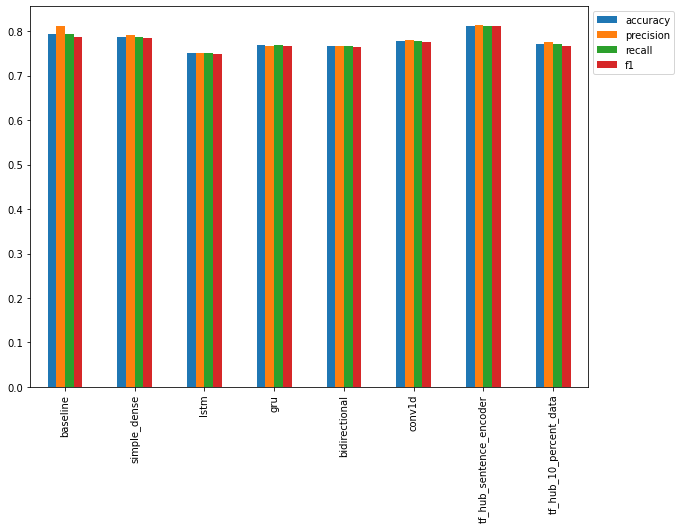

In [ ]:
# Vẽ và so sánh các kết quả của mô hình
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

Có vẻ như các mô hình USE TensorFlow Hub đã huấn luyện trước của chúng ta có chất lượng tốt nhất, thậm chí mô hình chỉ có 10% dữ liệu huấn luyện dường như cũng hoạt động tốt hơn các mô hình khác. Điều này cho thấy sức mạnh của transfer learning.

Làm thế nào để đi sâu và lấy F1-score của từng mô hình?

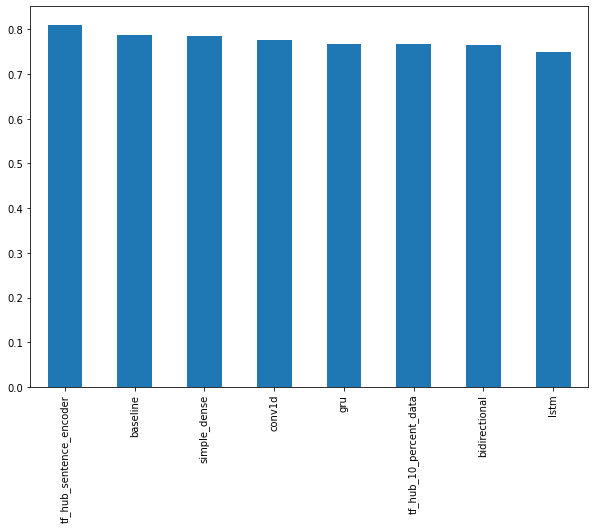

In [ ]:
# Sắp xếp kết quả của mô hình theo f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

Tìm hiểu kỹ hơn về một phép đo, chúng ta thấy các mô hình USE TensorFlow Hub hoạt động tốt hơn tất cả các mô hình khác. Thật thú vị, F1-score của mô hình cơ sở không quá cách biệt so với các mô hình sâu còn lại.

Chúng ta cũng có thể trực quan hóa tất cả nhật ký huấn luyện của mô hình bằng TensorBoard.dev.

In [ ]:
# # Xem tensorboad logs của các thử nghiệm mô hình hóa transfer learning (nên là 4 mô hình)
# # Upload các bản ghi TensorBoard dev
# !tensorboard dev upload --logdir ./model_logs \
#   --name "NLP modelling experiments" \
#   --description "A series of different NLP modellings experiments with various models" \
#   --one_shot # thoát khỏi uploader sau khi hoàn thành upload

Có thể xem TensorBoard logs của các thử nghiệm lập mô hình khác nhau mà chúng tôi đã chạy tại đây: https://tensorboard.dev/experiment/LkoAakb7QIKBZ0RL97cXbw/

In [ ]:
# Nếu cần loại bỏ các thử nghiệm trước, chúng ta có thể dùng lệnh sau
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

## Kết hợp các mô hình (model ensembling/stacking)

Nhiều hệ thống sản xuất sử dụng mô hình **ensemble** (kết hợp nhiều mô hình khác nhau) để đưa ra dự đoán.

Ý tưởng đằng sau model stacking là nếu một số mô hình không tương quan thống nhất về một dự đoán, thì dự đoán đó phải mạnh mẽ hơn dự đoán được thực hiện bởi một mô hình đơn lẻ.

Từ khóa trong câu trên là **không tương quan**, tức là các kiểu mô hình khác nhau. Ví dụ: trong trường hợp của chúng ta, có thể kết hợp mô hình cơ sở, mô hình hai chiều và mô hình USE TTensorFlow Hub.

Mặc dù tất cả các mô hình này đều được huấn luyện trên cùng một dữ liệu, nhưng chúng lại có cách tìm pattern khác nhau.

Nếu chúng ta sử dụng ba mô hình được huấn luyện tương tự, chẳng hạn như ba mô hình LSTM thì các dự đoán mà chúng đưa ra có thể sẽ rất giống nhau.

Hãy coi điều này như việc bạn đang quyết định đi ăn ở đâu với bạn bè. Nếu bạn và các ban của bạn có sở thích giống nhau, có thể các bạn sẽ chọn cùng một nhà hàng. Nhưng nếu các bạn có sở thích khác nhau và cuối cùng vẫn chọn cùng một nhà hàng, thì chắc hẳn nhà hàng đó phải tốt.

Since we're working with a classification problem, there are a few of ways we can combine our models: Do chúng ta đang giải bài toán phân loại, nên có một số cách để kết hợp các mô hình:
1. **Averaging** - Lấy xác suất dự đoán đầu ra của từng mô hình cho từng mẫu, kết hợp chúng lại rồi tính trung bình.
2. **Majority vote (mode)** - Đưa ra dự đoán về lớp với từng mô hình trên tất cả các mẫu, lớp được dự đoán chiếm đa số. Ví dụ: nếu ba mô hình khác nhau lần lượt dự đoán `[1, 0, 1]`, thì lớp đa số là `1`; như vậy, đó sẽ là nhãn được dự đoán.
3. **Model stacking** - Lấy đầu ra của từng mô hình đã chọn và sử dụng chúng làm đầu vào cho mô hình khác.

> 📖 **Tài liệu:** Các phương pháp model stacking/ensembling ở trên được trích từ Chương 6 của cuốn [Machine Learning Engineering](http://www.mlebook.com/wiki/doku.php) (Andriy Burkov). Nếu bạn đang muốn tìm hiểu lĩnh vực kỹ thuật máy học, không chỉ xây dựng mô hình mà cả hệ thống máy học trên quy mô sản xuất, tôi khuyến khích bạn nên đọc toàn bộ cuốn này.

Một lần nữa, khái niệm model stacking được thấy rõ nhất trong thực tế.

Chúng ta sẽ kết hợp mô hình cơ sở (`model_0`), mô hình LSTM (`model_2`) và mô hình USE được huấn luyện với toàn bộ dữ liệu huấn luyện (`model_6`) bằng cách tính trung bình các xác suất dự đoán kết hợp của từng mô hình.

In [ ]:
# Lấy mean pred probs cho 3 mô hình
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # lấy xác suất dự đoán từ mô hình cơ sở
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # tính trung bình và làm tròn các xác suất dự đoán để có được các lớp dự đoán
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

Tuyệt vời! Chúng ta có một mảng dự đoán kết hợp của các lớp khác nhau, hãy đánh giá chúng dựa trên true label và thêm kết quả của mô hình đã xếp chồng vào DataFrame `all_model_results`.

In [ ]:
# Tính toán kết quả từ việc tính trung bình các xác suất dự đoán
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 78.08398950131233,
 'f1': 0.7805169025578647,
 'precision': 0.7805216999297674,
 'recall': 0.7808398950131233}

In [ ]:
# Thêm các kết quả của mô hình kết hợp vào results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [ ]:
# Chuyển đổi accuracy sang cùng thang đo với các kết quả còn lại
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

In [ ]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.787402,0.791492,0.787402,0.784697
lstm,0.750656,0.751008,0.750656,0.748927
gru,0.767717,0.767545,0.767717,0.766793
bidirectional,0.766404,0.766590,0.766404,0.765121
conv1d,0.778215,0.780752,0.778215,0.775881
tf_hub_sentence_encoder,0.812336,0.814880,0.812336,0.810687
tf_hub_10_percent_data,0.770341,0.775563,0.770341,0.766706
ensemble_results,0.780840,0.780522,0.780840,0.780517


Mô hình xếp chồng đi ngược lại với các mô hình khác như thế nào?

> 🔑 **Lưu ý:** Có vẻ như nhiều kết quả của mô hình khá tương tự nhau. Điều này có nghĩa là có một số hạn chế đối với việc học từ dữ liệu. Khi nhiều thử nghiệm lập mô hình trả lại kết quả tương tự, bạn nên truy cập lại dữ liệu của mình, chúng ta sẽ thực hiện ngay điều này.

## Lưu và load mô hình đã huấn luyện

Mặc dù thời gian huấn luyện dài, nhưng chúng ta cũng nên lưu lại các mô hình đã huấn luyện để tránh phải huấn luyện lại.

Lưu các mô hình cũng cho phép chúng ta xuất chúng để sử dụng ở nơi khác bên ngoài notebook, chẳng hạn như trong một ứng dụng web.

Có hai cách chính để [lưu một mô hình trong TensorFlow](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model):
1. `HDF5` format.
2. `SavedModel` format (mặc định).

Chúng ta hãy xem xét cả hai.

In [ ]:
# Lưu mô hình TF Hub Sentence Encoder thành HDF5 format
model_6.save("model_6.h5")

Nếu chúng ta lưu mô hình ở dạng `HDF5`, thì khi load lại mô hình đó, cần [cho TensorFlow biết về bất kỳ đối tượng tùy chỉnh nào mà chúng ta đã sử dụng](https://www.tensorflow.org/tutorials/keras/save_and_load#saving_custom_objects) (ví dụ: các thành phần không được tạo từ TensorFlow thuần túy, chẳng hạn như các thành phần TensorFlow Hub).

In [ ]:
# Load mô hình với Hub Layer tùy chỉnh (yêu cầu với HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# Mô hình đã load hoạt động như thế nào?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 14ms/step - loss: 0.4309 - accuracy: 0.8123


[0.43088313937187195, 0.8123359680175781]

Gọi phương thức `save()` trên mô hình mục tiêu và chuyển cho nó một đường dẫn file cho phép chúng ta lưu mô hình của mình ở `SavedModel` format.

In [ ]:
# Lưu mô hình TF Hub Sentence Encoder thành SavedModel format (mặc định)
model_6.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


Nếu sử dụng SavedModel format (mặc định), chúng ta có thể reload mô hình của mình mà không cần chỉ định các đối tượng tùy chỉnh bằng cách sử dụng hàm [`tensorflow.keras.models.load_model()`](https://www.tensorflow.org/tutorials/keras/save_and_load).

In [ ]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Đánh giá SavedModel format đã load
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 14ms/step - loss: 0.4309 - accuracy: 0.8123


[0.43088313937187195, 0.8123359680175781]

Như các bạn thấy, việc lưu và load mô hình với một trong hai định dạng đều cho chất lượng như nhau.

> 🤔 **Câu hỏi:** Chúng ta nên sử dụng `SavedModel` format hay `HDF5` format?

Với hầu hết trường hợp, `SavedModel` format đã đủ. Tuy nhiên, đây là một tiêu chuẩn cụ thể của TensorFlow. Nếu bạn cần một tiêu chuẩn dữ liệu có mục đích chung hơn, `HDF5` có thể sẽ tốt hơn. Xem [tài liệu TensorFlow về cách lưu và load mô hình](https://www.tensorflow.org/tutorials/keras/save_and_load) để biết thêm chi tiết.

## Tìm những mẫu sai nhất

Chúng ta đã đề cập trước đó rằng nếu nhiều thử nghiệm lập mô hình trả lại các kết quả tương tự, dù sử dụng các loại mô hình khác nhau, thì chúng ta nên xem lại dữ liệu và kiểm tra xem tại sao lại như vậy.

Một trong những cách tốt nhất để kiểm tra dữ liệu là sắp xếp các dự đoán của mô hình và tìm các mẫu mà mô hình đó sai nhiều *nhất*, tức là những dự đoán có xác suất dự đoán cao nhưng hóa ra lại sai.

Vì vậy, hãy trực quan hóa nó ra.

Để mọi thứ trực quan hơn, hãy lấy các lớp và xác suất dự đoán của mô hình hoạt động tốt nhất cùng với các mẫu kiểm định (văn bản và nhãn gốc) và kết hợp chúng vào một pandas DataFrame.

* Nếu mô hình tốt nhất của chúng ta vẫn không hoàn hảo, thì có những mẫu nào bị sai?
* Những mẫu nào sai *nhất*?
* Có nhãn nào bị sai không? Ví dụ: mô hình gán đúng nhưng nhãn gốc không phản ánh được điều này.

In [ ]:
# Tạo dataframe với validation sentences và các dự đoán mô hình hoạt động tốt nhất
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.144432
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.727150
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.985666
3,@camilacabello97 Internally and externally scr...,1,0.0,0.197409
4,Radiation emergency #preparedness starts with ...,1,1.0,0.734170


Bây giờ, hãy tìm các dự đoán sai của mô hình (`target != pred`) và sắp xếp chúng theo xác suất dự đoán (cột `pred_prob`).

In [ ]:
# Tìm các dự đoán sai và sắp xếp theo xác suất dự đoán
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910481
759,FedEx will no longer transport bioterror patho...,0,1.0,0.864676
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.837961
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.836361
628,@noah_anyname That's where the concentration c...,0,1.0,0.835225
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.834875
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.800890
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.782611
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.782433
144,The Sound of Arson,0,1.0,0.771343


Cuối cùng, chúng ta có thể viết code để hiển thị văn bản mẫu, truth label, lớp dự đoán và xác suất dự đoán. Vì chúng ta đã sắp xếp các mẫu của mình theo xác suất dự đoán, nên việc xem các mẫu từ phần đầu của DataFrame `most_wrong` sẽ hiển thị false positives.

Nhắc lại:
* `0` = Không phải real diaster Tweet
* `1` = Real diaster Tweet

In [ ]:
# Kiểm tra false positives (mô hình dự đoán là 1 trong khi lẽ ra phải là 0)
for row in most_wrong[:10].itertuples(): # lặp qua 10 hàng trên cùng (thay đổi chỉ mục để xem các hàng khác nhau)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9104808568954468
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8646755218505859
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8379608988761902
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Prob: 0.8363614082336426
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8352250456809998
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8348745107650757
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Pr

Chúng ta có thể xem phần cuối của DataFrame `most_wrong` để kiểm tra false negatives (mô hình dự đoán 0, không phải là real diaster Tweet, trong khi lẽ ra nó phải dự đoán 1, real diaster Tweet).

In [ ]:
# Kiểm tra false negatives sai nhiều nhất (mô hình dự đoán là 0 trong khi lẽ ra nó phải dự đoán là 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.06304337829351425
Text:
@BoyInAHorsemask its a panda trapped in a dogs body

----

Target: 1, Pred: 0, Prob: 0.06279505044221878
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob: 0.06060810014605522
Text:
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

----

Target: 1, Pred: 0, Prob: 0.0573178268969059
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.04535556212067604
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.04145137220621109
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.03926113247871399
Text:
@SoonerMagic_ I mean I'm a fan but I 

Bạn có nhận thấy điều gì thú vị về những mẫu sai nhất không?

Các nhãn gốc có chính xác không? Bạn nghĩ điều gì sẽ xảy ra nếu chúng ta quay lại và sửa các nhãn không đúng?

## Đưa ra dự đoán trên tập dữ liệu kiểm tra

Chúng ta đã thấy mô hình hoạt động như thế nào trên tập kiểm định.

Vậy nó hoạt động như thế nào trên tập kiểm tra?

Chúng ta không có nhãn cho tập dữ liệu kiểm tra, vì vậy, chúng ta sẽ phải đưa ra một số dự đoán và tự kiểm tra chúng.

Hãy viết code để đưa ra dự đoán trên các mẫu ngẫu nhiên từ tập dữ liệu kiểm tra và hiển thị chúng.

In [ ]:
# Đưa ra dự đoán trên tập dữ liệu kiểm tra
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # phải là list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

Pred: 1, Prob: 0.538340151309967
Text:
Flash Flood Watch in effect through 7:00am Thursday morning/12:00pm Thursday afternoon.
For: Perry Wayne Cape... http://t.co/fs7vro5seS

----

Pred: 1, Prob: 0.9250481128692627
Text:
NONSENSE &gt;&gt; famine memories  -- strong exaggeration of Ukrainian MSM
#ukraine #russia #?????????? #sanctions https://t.co/dDOTd7W2o8

----

Pred: 1, Prob: 0.8940093517303467
Text:
New warning for Central Hills 1' hail 60 mph winds. NOT affecting Sturgis but could later tonight. #KOTAWeather http://t.co/E8oUxVKuTE

----

Pred: 0, Prob: 0.07600127905607224
Text:
@imaginator1dx currently reading after. as you can see after we collided is on my dresser waiting to get read http://t.co/QwrASZ6LHO

----

Pred: 0, Prob: 0.026800094172358513
Text:
Don't ruin a good today by thinking about a bad yesterday ????

----

Pred: 0, Prob: 0.21049749851226807
Text:
I hope I get electrocuted today at work

----

Pred: 0, Prob: 0.07167388498783112
Text:
http://t.co/16EClWrW84 Asics

Các dự đoán của mô hình trông như thế nào trên tập dữ liệu kiểm tra?

Cần thực hiện các loại kiểm tra trực quan này thường xuyên nhất có thể để xem qua cách mô hình hoạt động trên dữ liệu chưa biết, rồi cách nó hoạt động trong thử nghiệm thực: Tweets from the wild.

## Dự đoán về Tweets from the wild

Làm thế nào để tìm thấy một số Tweet và sử dụng mô hình của chúng ta để dự đoán xem chúng có phải thảm họa không?

Để bắt đầu, hãy lấy một trong các Tweet của tôi: [cuộc sống giống như một mô hình ensemble](https://twitter.com/mrdbourke/status/1313649328351662082).

In [ ]:
# Biến Tweet thành string
daniels_tweet = "Life like an ensemble: take the best choices from others and make your own"

Giờ chúng ta sẽ viết một hàm nhỏ nhận mô hình và câu mẫu rồi trả về dự đoán.

In [ ]:
def predict_on_sentence(model, sentence):
  """
  Sử dụng mô hình để đưa ra dự đoán về câu.

  Trả về câu, nhãn đã dự đoán và xác suất dự đoán.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

Tuyệt! Giờ hãy kiểm tra mô hình.

In [ ]:
# Đưa ra dự đoán về Tweet from the wild
predict_on_sentence(model=model_6, # Sử dụng mô hình USE
                    sentence=daniels_tweet)

Pred: 0.0 (not real disaster) Prob: 0.046233948320150375
Text:
Life like an ensemble: take the best choices from others and make your own


Mô hình của chúng ta đã dự đoán đúng. Tweet của tôi không phải về thảm họa.

Làm thế nào để tìm được một vài Tweet về các thảm họa thực tế?

Chẳng hạn như hai Tweet sau về vụ nổ tại Beirut năm 2020.

In [ ]:
# Nguồn - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Nguồn - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [ ]:
# Dự đoán về Tweet 1: diaster
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_1)

Pred: 1.0 (real disaster) Prob: 0.9625465869903564
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [ ]:
# Dự đoán về Tweet 2: diaster
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_2)

Pred: 1.0 (real disaster) Prob: 0.9678557515144348
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon


Có vẻ như mô hình của chúng ta đang hoạt động như dự kiến, dự đoán cả hai Tweet về diaster thực sự là thảm họa.

> 🔑 **Lưu ý:** Các ví dụ trên được tuyển chọn và là những trường hợp chúng ta dự kiến mô hình hoạt động với chất lượng cao. Đối với các hệ thống sản xuất thực tế, chúng ta sẽ cần liên tục thực hiện các kiểm thử để xem mô hình đang hoạt động như thế nào.

## Cân bằng hệ số/tốc độ

Một trong những bài kiểm tra cuối cùng mà chúng ta sẽ thực hiện là tìm cân bằng tốc độ/hệ số giữa mô hình tốt nhất và mô hình cơ sở.

Tại sao điều này lại quan trọng?

Mặc dù chúng ta có thể chọn được mô hình hoạt động tốt nhất thông qua thử nghiệm, nhưng mô hình này có thể không thực sự hiệu quả trong thiết lập sản xuất.

Theo cách này, giả sử chúng ta đang sử dụng Twitter và nhận được 1 triệu Tweet mỗi giờ (đây chỉ là con số bịa đặt, con số thực tế cao hơn nhiều). Chúng ta đang cố gắng xây dựng một hệ thống phát hiện thiên tai để đọc các Tweet và cảnh báo các cơ quan chức năng về các thiên tai sát với thực tế.

Năng lực máy tính không miễn phí, vì vậy chúng ta bị giới hạn, chỉ có duy nhất một máy tính cho dự án. Ở máy đó, một trong các mô hình sẽ thực hiện 10,000 dự đoán mỗi giây với độ chính xác 80% trong khi một mô hình khác (mô hình lớn hơn) đưa ra 100 dự đoán mỗi giây với độ chính xác 85%.

Bạn sẽ chọn mô hình nào?

Việc tăng chất lượng của mô hình thứ hai có đáng để bỏ qua năng lực bổ sung không?

Tất nhiên, chúng ta có thể thử nhiều tùy chọn thử ở đây, chẳng hạn như gửi càng nhiều Tweet càng tốt cho mô hình đầu tiên, sau đó gửi những Tweet mà mô hình đó ít chắc chắn nhất cho mô hình thứ hai.

Vấn đề ở đây là cần minh họa mô hình tốt nhất mà chúng ta tìm thấy thông qua thử nghiệm, có thể không phải mô hình mà chúng ta sử dụng trong quá trình sản xuất.

Để cụ thể hơn, hãy viết một hàm lấy một mô hình, một số mẫu và thời gian để mô hình đưa ra dự đoán về các mẫu đó.

In [ ]:
# Tính thời gian dự đoán
import time
def pred_timer(model, samples):
  """
  Thời gian một mô hình đưa ra dự đoán trên các mẫu.

  Đối số:
  ----
  model = mô hình đã huấn luyện
  sample = danh sách các mẫu

  Trả về:
  ----
  total_time = tổng thời gian đã trôi qua để mô hình đưa ra dự đoán trên các mẫu
  time_per_pred = thời gian tính bằng giây cho mỗi mẫu đơn lẻ
  """
  start_time = time.perf_counter() # lấy thời gian bắt đầu
  model.predict(samples) # đưa ra dự đoán
  end_time = time.perf_counter() # get finish time lấy thời gian kết thúc
  total_time = end_time-start_time # tính xem dự đoán mất bao nhiêu thời gian
  time_per_pred = total_time/len(val_sentences) # tìm thời gian dự đoán cho mỗi mẫu
  return total_time, time_per_pred

Trông ổn đấy!

Bây giờ, hãy sử dụng hàm `pred_timer()` để đánh giá thời gian dự đoán của mô hình hoạt động tốt nhất (`model_6`) và mô hình cơ sở của chúng ta (`model_0`).

In [ ]:
# Tính thời gian dự đoán của TF Hub Sentence Encoder
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

(0.3529780789999677, 0.0004632258254592752)

In [ ]:
# Tính thời gian dự đoán của Naive Bayes
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.018752853000023606, 2.4610043307117593e-05)

Có vẻ như với phần cứng hiện tại của chúng ta (trong trường hợp này, tôi đang sử dụng Google Colab notebook), mô hình hoạt động tốt nhất tốn gấp 10 lần thời gian để đưa ra dự đoán như mô hình cơ sở.

Thời gian dự đoán thêm đó có đáng không?

Hãy so sánh thời gian trên mỗi dự đoán với F1-score của mô hình.

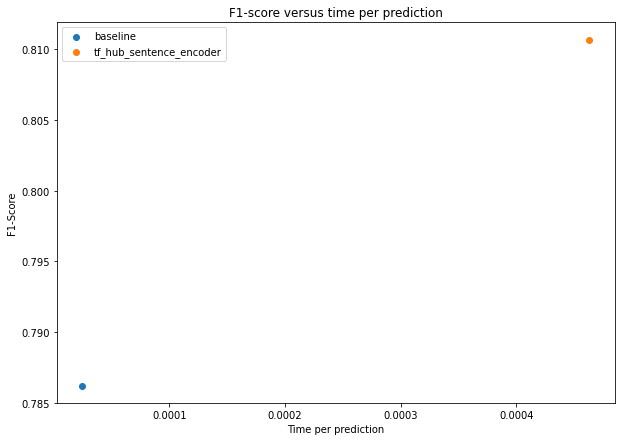

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-ideal-performance-speed-of-pred-tradeoff-highlighted.png)
*Vị trí lý tưởng cho mô hình cân bằng tốc độ và chất lượng (dự đoán nhanh với kết quả tốt).*

Tất nhiên, vị trí lý tưởng cho mỗi chấm này là ở phía trên cùng bên trái của biểu đồ (thời gian cho mỗi dự đoán thấp, F1-score cao).

Trong trường hợp này, có sự cân bằng rõ ràng về thời gian cho mỗi dự đoán và chất lượng. Mô hình hoạt động tốt nhất của chúng ta có bậc độ lớn dài hơn hơn cho mỗi dự đoán nhưng chỉ dẫn đến việc tăng một số điểm F1-score.

Các bạn cần chú ý loại cân bằng này khi kết hợp các mô hình học máy vào ứng dụng của riêng mình.

## 🛠 Bài tập thực hành
> **Lưu ý:** Các bạn cần làm phần bài tập này để chuẩn bị cho phiên review lab.

1. Xây dựng lại, biên dịch và huấn luyện `model_1`, `model_2` và `model_5` bằng [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) thay vì Functional API.
2. Huấn luyện lại mô hình cơ sở với 10% dữ liệu huấn luyện. Mô hình này hoạt động như thế nào so với mô hình Universal Sentence Encoder với 10% dữ liệu huấn luyện?
3. Thử tinh chỉnh mô hình TF Hub Universal Sentence Encoder bằng cách đặt `training=True` khi khởi tạo nó dưới dạng Keras layer.

```
Chúng ta có thể sử dụng encoding layer thay cho text_vectorizer và embedding layer

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) # bật huấn luyện để tinh chỉnh mô hình TensorFlow Hub
```
4. Huấn luyện lại mô hình tốt nhất mà bạn có trên toàn bộ tập huấn luyện (không phân tách kiểm định). Sau đó sử dụng mô hình đã huấn luyện này để đưa ra dự đoán trên tập dữ liệu kiểm tra và định dạng dự đoán sao cho có cùng định dạng với file `sample_submission.csv` từ Kaggle (xem tab Files trên Colab để biết file `sample_submission.csv` trông như thế nào). Sau khi hoàn thành, [hãy gửi tới Kaggle competition](https://www.kaggle.com/c/nlp-getting-started/data), mô hình của bạn hoạt động như thế nào?
5. Kết hợp các dự đoán ensemble bằng cách sử dụng majority vote (mode), điều này hoạt động như thế nào so với tính trung bình xác suất dự đoán của từng mô hình?
6. Tạo confusion matrix với các dự đoán của mô hình hoạt động tốt nhất trên tập kiểm định và các nhãn gốc kiểm định.

## 📖 Tài liệu đọc thêm

Để thực hành những gì đã học, bạn nên dành mỗi giờ cho 3 trong số những điều sau đây (tổng cộng 3 giờ, bạn cũng có thể xem qua tất cả nếu muốn), sau đó viết blog về những gì bạn đã học được.

* Để có cái nhìn tổng quan về các bài toán khác nhau trong NLP và cách xử lý chúng, hãy đọc qua:
 * [A Simple Introduction to Natural Language Processing](https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32)
 * [How to solve 90% of NLP problems: a step-by-step guide](https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e)
* Xem qua [các bài giảng của MIT về Recurrent Neural Networks](https://youtu.be/SEnXr6v2ifU). Đây sẽ là một trong những phần bổ sung tuyệt vời nhất về những gì diễn ra đằng sau mô hình RNN mà bạn đang xây dựng.
* Đọc qua trang [word embedding trên website TensorFlow](https://www.tensorflow.org/tutorials/text/word_embeddings), embedding là một bộ phận lớn của NLP. Chúng ta đã đề cập chúng trong suốt notebook này nhưng vẫn nên luyện tập thêm, tốt hơn nên viết toàn bộ code vào notebook mới.
* Để biết thêm về RNN trong TensorFlow, hãy đọc và mô phỏng lại [TensorFlow RNN guide](https://www.tensorflow.org/guide/keras/rnn). Chúng tôi đã đề cập nhiều khái niệm trong hướng dẫn này, tuy nhiên, bạn vẫn nên tự viết lại code.
* Không phải lúc nào dữ liệu text cũng có một thư viện tốt như dữ liệu chúng ta đã download. Vì vậy, nếu bạn muốn chuẩn bị nhiều nguồn text khác nhau cho các mô hình học sâu TensorFlow, hãy kiểm tra những điều sau:
 * [Hướng dẫn load text TensorFlow](https://www.tensorflow.org/tutorials/load_data/text).
  * [Đọc file text với Python](https://realpython.com/read-write-files-python/) từ Real Python.
* Notebook này tập trung vào việc viết code NLP. Để biết NLP với Học sâu diễn ra thế nào về mặt toán học, hãy đọc [Phần 1 của bài giảng Xử lý ngôn ngữ tự nhiên với Học sâu đến từ Standford](https://web.stanford.edu/class/cs224n/readings/cs224n-2019-notes01-wordvecs1.pdf).
  * Để tìm hiểu sâu hơn nữa, bạn có thể tham gia toàn bộ khóa học [CS224n](http://web.stanford.edu/class/cs224n/) (Xử lý ngôn ngữ tự nhiên với Học sâu).
* Các bài blog hay nên đọc:
  * [The Unreasonable Effectiveness of RNNs](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) (Andrei Karpathy) đào sâu vào việc tạo Shakespeare text với RNN.
  * [Text Classification with NLP: Tf-Idf vs Word2Vec vs BERT](https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794) (Mauro Di Pietro). Tổng quan về các kỹ thuật khác nhau để chuyển text thành số rồi phân loại nó.
  * [What are word embeddings?](https://machinelearningmastery.com/what-are-word-embeddings/) từ Machine Learning Mastery.
* Các chủ đề đáng cân nhắc khác:
  * [Cơ chế Attention](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/). Đây là thành phần cơ bản của kiến ​​trúc transformer và cũng thường cải thiện cho các mô hình NLP sâu.
  * [Kiến trúc Transformer](http://jalammar.github.io/illustrated-transformer/). Kiến trúc mô hình này gần đây đã gây bão cộng đồng NLP, ghi điểm các đánh giá xếp hạng tân tiến nhất. Tuy nhiên, cần xử lý thêm để bắt đầu, thư viện [HuggingFace Models (trước đây là HuggingFace Transformers)](https://huggingface.co/models/) có lẽ là khởi đầu tốt nhất của bạn.
    * Và bây giờ [HuggingFace cũng có khóa học riêng](https://huggingface.co/course/chapter1) về cách hoạt động của thư viện! Tôi chưa thực hiện được điều đó, nhưng bất cứ thứ gì HuggingFace làm ra đều ở đẳng cấp thế giới.



> 📖 **Tài liệu:** Xem toàn bộ tài liệu khóa học trên GitHub: https://github.com/mrdbourke/tensorflow-deep-learning